# MoneyMe Assessment
## Author: Partheesh Marwah

### Solution Approach
* Import all the required libraries and functions
* Read dataset and perform exploratory analysis
* Handling Outliers
* Missing value imputation
* Feature selection
* Transform data
* Categorize/Dummify
* Split dataset
* Training and Cross Validation

# Importing Libraries

In [ ]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None) #to display all columns and rows.
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import svm,metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import math
%matplotlib inline

## Reading Dataset

In [ ]:
df = pd.read_csv("/content/PT_data.csv")

## Exploratory Analysis

In [ ]:
print ("Original shape = ",df.shape)
df.head(5)

Original shape =  (2247, 77)


,Wages,AgeOfSubject,Gender,Insurance,AgeOfFile,NonDiscretionarySpending,VedaScore,Groceries,NonSaccLoans,DiscretionarySpending,PostalCode,PreviousLoans,MaritalStatus,EmploymentSector,Utilities,EmploymentStatus,Dependants,EmploymentLength,CreditEnquiries3,CreditEnquiries1,CreditEnquiries6,EmploymentPayFrequency,CurrentBalance_all,AvailableBalance_all,OpeningBalance_all,TotalCredits_all,TotalDebits_all,ClosingBalance_all,DaysInNegative_all,CurrentBalance_tran,AvailableBalance_tran,OpeningBalance_tran,TotalCredits_tran,TotalDebits_tran,ClosingBalance_tran,DaysInNegative_tran,CurrentBalance_sav,AvailableBalance_sav,OpeningBalance_sav,TotalCredits_sav,TotalDebits_sav,ClosingBalance_sav,DaysInNegative_sav,TransactionCount_all,CreditCount_all,DebitCount_all,TotalCreditAmount_all,TotalDebitAmount_all,MaxCreditAmount_all,MinCreditAmount_all,MaxDebitAmount_all,MinDebitAmount_all,MaxBalance_all,MinBalance_all,TransactionCount_tran,CreditCount_tran,DebitCount_tran,TotalCreditAmount_tran,TotalDebitAmount_tran,MaxCreditAmount_tran,MinCreditAmount_tran,MaxDebitAmount_tran,MinDebitAmount_tran,MaxBalance_tran,MinBalance_tran,TransactionCount_sav,CreditCount_sav,DebitCount_sav,TotalCreditAmount_sav,TotalDebitAmount_sav,MaxCreditAmount_sav,MinCreditAmount_sav,MaxDebitAmount_sav,MinDebitAmount_sav,MaxBalance_sav,MinBalance_sav,IsDefault
0,4982.285,603.812,Mr.,28.281,223.146,657.397,501,241.857,329.230,454.120,6430,0.000,Single,"Mining, Oil & Gas",0.000,Full time,0,3 months to 1 year,3,3,6,Fortnightly,-54175.396,0.044,-53769.298,23501.401,-23907.499,-54175.396,23.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-51.513,0.044,1280.400,19717.709,-21049.622,-51.513,23.000,301.000,73.000,226.000,23501.401,-23907.499,2816.000,0.011,-213.279,-11.000,2913.944,-54171.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.000,48.000,188.000,19717.709,-21049.622,3916.000,0.022,-1650.000,-6.050,4014.769,-103.125,0
1,3791.546,605.891,Ms.,0.000,83.534,1661.180,517,725.566,560.003,1110.353,4506,0.000,Married,Medical & Healthcare,309.177,Part time,1,More than 1 year,3,2,4,Fortnightly,-8555.613,0.275,-8359.428,28058.316,-28284.476,-8555.613,108.000,-8457.669,0.000,-8412.679,1285.834,-1360.799,-8457.669,92.000,-97.944,0.275,53.251,26772.482,-26923.677,-97.944,16.000,410.000,83.000,324.000,28058.316,-28284.476,2152.348,0.011,-266.992,-203.500,3061.267,-8457.669,33.000,11.000,22.000,1285.834,-1360.799,266.321,0.671,-266.992,-0.825,-7763.008,-8457.669,377.000,72.000,302.000,26772.482,-26923.677,2768.348,0.022,-1606.000,-203.588,4104.298,-983.059,1
2,5680.125,729.003,Mr.,0.000,38.379,928.532,644,396.286,708.532,1216.598,4152,0.000,Single,Government & Defence,0.000,Full time,0,More than 1 year,2,1,2,Fortnightly,-11680.009,1015.410,-11170.148,26830.111,27339.972,-11680.009,99.000,-1160.830,534.589,-1581.591,24409.858,23989.097,-1160.830,99.000,220.836,220.836,1155.583,1540.253,2475.000,220.836,0.000,267.000,50.000,215.000,26830.111,-27339.972,3590.741,0.033,-182.952,-110.000,3849.835,-11180.015,228.000,35.000,192.000,24409.858,-23989.097,4140.741,74.811,-974.952,-5.819,2759.570,-1756.436,20.000,11.000,9.000,1540.253,-2475.000,220.000,0.033,-605.000,-110.000,550.583,0.583,0
3,4357.584,325.798,Miss,0.000,15.620,2299.661,490,284.009,436.646,1542.750,4007,0.000,Single,Customer Service & Call Center,191.015,Full time,0,3 months to 1 year,0,0,1,Weekly,183.634,183.634,101.695,27706.690,-27624.751,183.634,22.000,57.761,57.761,7.095,21702.186,-21651.520,57.761,22.000,125.873,125.873,94.600,6004.504,-5973.231,125.873,0.000,805.000,244.000,559.000,27706.690,-27624.751,1218.943,0.033,-151.800,-11.000,2012.065,-989.505,625.000,184.000,440.000,21702.186,-21651.520,2054.943,5.401,-1508.023,-11.198,3558.665,-1099.175,179.000,59.000,119.000,6004.504,-5973.231,1002.023,43.604,-756.657,-2.244,1369.852,0.000,0
4,7569.298,492.492,Mrs.,58.465,251.823,3930.618,473,498.900,2233.912,1650.000,4557,0.000,Single,Government & Defence,58.927,Full time,0,More than 1 year,2,2,2,Fortnightly,-20069.698,749.034,-24439.635,7

In [ ]:
#To know the type of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wages                     2241 non-null   float64
 1   AgeOfSubject              2247 non-null   float64
 2   Gender                    2247 non-null   object 
 3   Insurance                 2241 non-null   float64
 4   AgeOfFile                 2247 non-null   float64
 5   NonDiscretionarySpending  2241 non-null   float64
 6   VedaScore                 2247 non-null   int64  
 7   Groceries                 2241 non-null   float64
 8   NonSaccLoans              2241 non-null   float64
 9   DiscretionarySpending     2241 non-null   float64
 10  PostalCode                2247 non-null   int64  
 11  PreviousLoans             2092 non-null   float64
 12  MaritalStatus             2237 non-null   object 
 13  EmploymentSector          2246 non-null   object 
 14  Utilitie

In [ ]:
categorical_columns = ["Gender", "EmploymentPayFrequency", "MaritalStatus", "EmploymentSector",\
                       "EmploymentStatus", "EmploymentLength", "Dependants","IsDefault"]
numerical_columns = list(df.drop(categorical_columns,axis=1).columns)
df.describe()

,Wages,AgeOfSubject,Insurance,AgeOfFile,NonDiscretionarySpending,VedaScore,Groceries,NonSaccLoans,DiscretionarySpending,PostalCode,PreviousLoans,Utilities,CreditEnquiries3,CreditEnquiries1,CreditEnquiries6,CurrentBalance_all,AvailableBalance_all,OpeningBalance_all,TotalCredits_all,TotalDebits_all,ClosingBalance_all,DaysInNegative_all,CurrentBalance_tran,AvailableBalance_tran,OpeningBalance_tran,TotalCredits_tran,TotalDebits_tran,ClosingBalance_tran,DaysInNegative_tran,CurrentBalance_sav,AvailableBalance_sav,OpeningBalance_sav,TotalCredits_sav,TotalDebits_sav,ClosingBalance_sav,DaysInNegative_sav,TransactionCount_all,CreditCount_all,DebitCount_all,TotalCreditAmount_all,TotalDebitAmount_all,MaxCreditAmount_all,MinCreditAmount_all,MaxDebitAmount_all,MinDebitAmount_all,MaxBalance_all,MinBalance_all,TransactionCount_tran,CreditCount_tran,DebitCount_tran,TotalCreditAmount_tran,TotalDebitAmount_tran,MaxCreditAmount_tran,MinCreditAmount_tran,MaxDebitAmount_tran,MinDebitAmount_tran,MaxBalance_tran,MinBalance_tran,TransactionCount_sav,CreditCount_sav,DebitCount_sav,TotalCreditAmount_sav,TotalDebitAmount_sav,MaxCreditAmount_sav,MinCreditAmount_sav,MaxDebitAmount_sav,MinDebitAmount_sav,MaxBalance_sav,MinBalance_sav,IsDefault
count,2241.000,2247.000,2241.000,2247.000,2241.000,2247.000,2241.000,2241.000,2241.000,2247.000,2092.000,2241.000,2247.000,2247.000,2247.000,2173.000,2173.000,2173.000,2173.000,2173.000,2173.000,2173.000,1933.000,1933.000,1933.000,1933.000,1933.000,1933.000,1933.000,1657.000,1657.000,1657.000,1657.000,1657.000,1657.000,1657.000,2173.000,2173.000,2173.000,2173.000,2173.000,2173.000,2173.000,2173.000,2173.000,2173.000,2173.000,1921.000,1921.000,1921.000,1921.000,1921.000,1921.000,1921.000,1921.000,1921.000,1921.000,1921.000,1474.000,1474.000,1474.000,1474.000,1474.000,1474.000,1474.000,1474.000,1474.000,1474.000,1474.000,2247.000
mean,5284.539,450.704,158.592,134.525,1932.787,590.486,349.770,694.066,1205.184,3573.089,0.491,137.944,1.939,1.331,2.709,-33273.471,1442.593,-31499.371,36710.928,-14290.339,-33237.408,26.141,187.475,813.476,585.702,30267.306,-9451.224,223.049,22.457,641.070,828.295,1203.617,8530.078,-5796.850,658.464,2.527,529.821,98.348,430.076,41889.296,-43647.607,4375.545,12.562,-626.725,-153.293,6734.584,-29752.639,433.471,71.303,361.237,33593.988,-33977.443,5657.625,92.677,-3435.012,-11.666,6518.759,-930.923,120.269,30.323,89.149,11195.902,-12208.939,2795.934,166.657,-2065.129,-201.314,4275.759,173.279,0.124
std,4797.934,150.230,369.607,114.021,2373.995,146.299,303.485,844.923,866.915,1380.876,0.737,271.690,1.596,1.027,2.073,129547.201,17452.893,125697.219,42943.587,60031.222,127851.755,46.343,5298.269,3626.289,4573.548,35955.648,45928.283,5220.792,40.333,13448.367,7455.046,14000.394,18536.933,20498.844,13456.874,9.964,485.642,110.428,407.966,51639.684,59160.951,8267.142,117.880,2599.807,1266.852,17388.201,99597.514,266.760,64.697,229.355,38945.686,39197.253,12029.242,617.851,8544.740,124.141,14065.538,4545.235,200.156,55.410,163.800,23763.672,25019.223,7062.759,2100.557,5323.725,2068.061,16714.186,14140.031,0.330
min,0.000,0.000,0.000,-1.100,0.000,0.000,0.000,0.000,110.000,800.000,0.000,0.000,0.000,0.000,0.000,-1579522.186,-712723.198,-1566904.724,1425.556,-903790.404,-1579522.186,0.000,-80714.821,-1575.365,-80769.612,0.000,-791426.812,-80714.821,0.000,-444464.658,-91899.522,-443389.606,0.000,-455407.876,-444464.658,0.000,29.000,3.000,20.000,1425.556,-967673.828,550.000,0.000,-110719.224,-52921.825,-10975.063,-937430.835,4.000,0.000,2.000,440.000,-791426.812,187.000,0.000,-209137.500,-2970.220,-56066.681,-85769.321,1.000,0.000,0.000,0.000,-455407.876,0.000,0.000,-88330.000,-54450.000,-436259.934,-444486.680,0.000
25%,3375.152,337.887,0.000,40.859,952.346,499.000,142.312,63.459,703.703,2326.500,0.000,0.000,1.000,1.000,1.000,-12181.950,24.497,-9613.032,18807.536,-33484.748,-10946.320,0.000,1.353,6.006,17.270,16377.944,-27462.468,1.595,0.000,0.066,0.077,0.132,464.497,-8553.600,0.066,0.000,310.000,40.000,255.

**Assumptions inferrred from the above summary:**

1. the AgeOfSubject has minimum value of 0, which cannot be possible.
2. The AgeOfFile has minimum value as negative, which cannot be the case.
3. The value of wage should not be zero.

Hence, these records will be removed from the dataset.

In [ ]:
df = df.loc[df["AgeOfSubject"] != 0]
df = df.loc[df["AgeOfFile"] >= 0]
df = df.loc[df["Wages"] > 0]
print(df.shape)
df.describe()

(2008, 77)


,Wages,AgeOfSubject,Insurance,AgeOfFile,NonDiscretionarySpending,VedaScore,Groceries,NonSaccLoans,DiscretionarySpending,PostalCode,PreviousLoans,Utilities,CreditEnquiries3,CreditEnquiries1,CreditEnquiries6,CurrentBalance_all,AvailableBalance_all,OpeningBalance_all,TotalCredits_all,TotalDebits_all,ClosingBalance_all,DaysInNegative_all,CurrentBalance_tran,AvailableBalance_tran,OpeningBalance_tran,TotalCredits_tran,TotalDebits_tran,ClosingBalance_tran,DaysInNegative_tran,CurrentBalance_sav,AvailableBalance_sav,OpeningBalance_sav,TotalCredits_sav,TotalDebits_sav,ClosingBalance_sav,DaysInNegative_sav,TransactionCount_all,CreditCount_all,DebitCount_all,TotalCreditAmount_all,TotalDebitAmount_all,MaxCreditAmount_all,MinCreditAmount_all,MaxDebitAmount_all,MinDebitAmount_all,MaxBalance_all,MinBalance_all,TransactionCount_tran,CreditCount_tran,DebitCount_tran,TotalCreditAmount_tran,TotalDebitAmount_tran,MaxCreditAmount_tran,MinCreditAmount_tran,MaxDebitAmount_tran,MinDebitAmount_tran,MaxBalance_tran,MinBalance_tran,TransactionCount_sav,CreditCount_sav,DebitCount_sav,TotalCreditAmount_sav,TotalDebitAmount_sav,MaxCreditAmount_sav,MinCreditAmount_sav,MaxDebitAmount_sav,MinDebitAmount_sav,MaxBalance_sav,MinBalance_sav,IsDefault
count,2008.000,2008.000,2008.000,2008.000,2008.000,2008.000,2008.000,2008.000,2008.000,2008.000,1866.000,2008.000,2008.000,2008.000,2008.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1739.000,1739.000,1739.000,1739.000,1739.000,1739.000,1739.000,1472.000,1472.000,1472.000,1472.000,1472.000,1472.000,1472.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1727.000,1727.000,1727.000,1727.000,1727.000,1727.000,1727.000,1727.000,1727.000,1727.000,1727.000,1312.000,1312.000,1312.000,1312.000,1312.000,1312.000,1312.000,1312.000,1312.000,1312.000,1312.000,2008.000
mean,5685.235,457.885,161.658,139.559,1910.023,593.518,351.878,707.276,1201.988,3558.000,0.495,135.434,1.986,1.369,2.776,-35457.227,1337.658,-33694.989,36200.370,-12519.814,-35556.505,27.318,89.336,768.386,527.910,29700.938,-7938.072,123.204,23.428,539.027,748.760,1097.352,8197.076,-5236.114,552.698,2.500,528.235,97.136,429.660,41121.865,-43005.286,4250.020,10.413,-613.419,-161.653,6570.157,-32002.841,432.010,70.170,360.886,33035.047,-33463.959,5492.163,87.519,-3397.716,-11.555,6253.351,-998.881,115.495,29.891,84.804,10493.708,-11498.716,2664.899,167.358,-2038.692,-203.843,3979.411,64.166,0.122
std,4734.497,142.028,375.125,112.621,1589.204,131.313,301.493,838.891,866.528,1379.700,0.740,241.752,1.566,1.032,2.052,133842.832,17816.053,129781.220,42580.658,60803.156,132121.510,47.360,4838.987,2742.207,4612.922,35262.291,45731.481,4740.057,41.200,13482.707,6386.432,14053.718,17817.425,19771.130,13491.501,10.030,494.124,106.846,418.833,50289.207,58671.626,7869.507,45.634,2712.199,1336.432,17235.407,104223.304,267.811,63.767,230.567,38540.551,39020.245,11563.259,550.345,8746.440,126.176,13413.565,4565.013,194.763,55.937,157.415,20141.736,21129.547,6152.960,2194.289,5334.310,2160.481,16170.883,14152.462,0.327
min,16.500,237.820,0.000,0.011,0.000,209.000,0.000,0.000,110.000,800.000,0.000,0.000,0.000,0.000,1.000,-1579522.186,-712723.198,-1566904.724,1425.556,-903790.404,-1579522.186,0.000,-80714.821,-1031.690,-80769.612,0.000,-791426.812,-80714.821,0.000,-444464.658,-91899.522,-443389.606,0.000,-455407.876,-444464.658,0.000,29.000,3.000,20.000,1425.556,-967673.828,550.000,0.000,-110719.224,-52921.825,-1587.575,-937430.835,4.000,0.000,2.000,440.000,-791426.812,187.000,0.000,-209137.500,-2970.220,-56066.681,-85769.321,1.000,0.000,0.000,0.000,-455407.876,0.000,0.000,-88330.000,-54450.000,-436259.934,-444486.680,0.000
25%,3623.785,343.068,0.000,46.060,971.718,499.000,146.178,86.936,707.661,2324.000,0.000,0.000,1.000,1.000,1.000,-12911.401,23.821,-10571.000,18735.679,-32623.412,-11841.808,0.000,0.891,5.786,11.665,16365.289,-26501.789,1.210,0.000,0.088,0.088,0.154,504.449,-8050.741,0.088,0.000,310.000,40.000,2

<ipython-input-45-9aac2e821da6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=False)


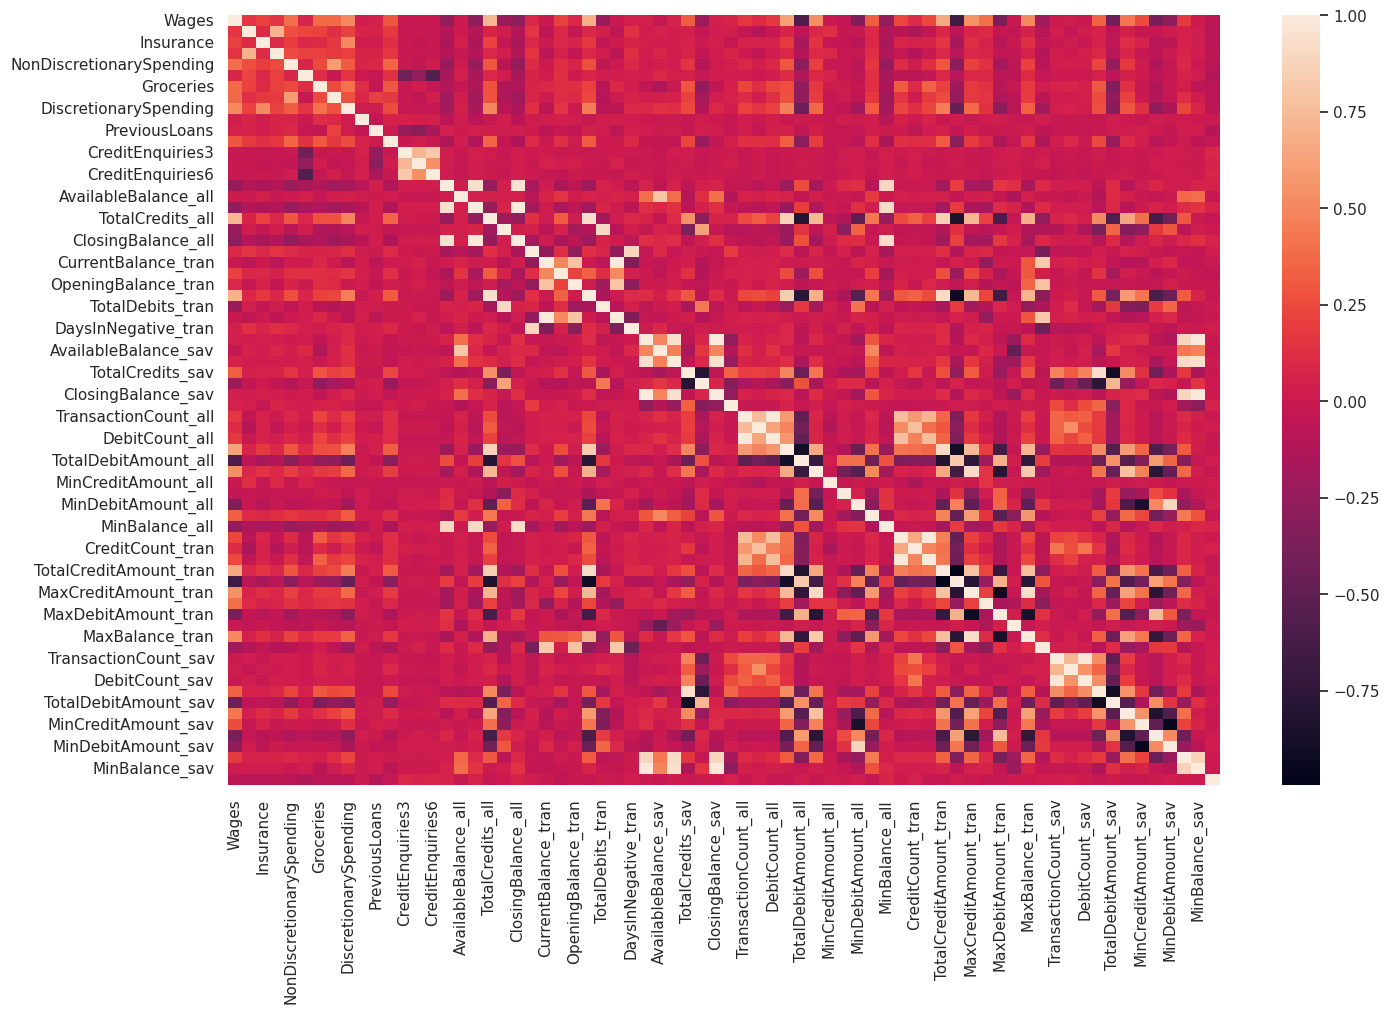

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=False)
plt.show()

,Wages,AgeOfSubject,Gender,Insurance,AgeOfFile,NonDiscretionarySpending,VedaScore,Groceries,NonSaccLoans,DiscretionarySpending,PostalCode,PreviousLoans,MaritalStatus,EmploymentSector,Utilities,EmploymentStatus,Dependants,EmploymentLength,CreditEnquiries3,CreditEnquiries1,CreditEnquiries6,EmploymentPayFrequency,CurrentBalance_all,AvailableBalance_all,OpeningBalance_all,TotalCredits_all,TotalDebits_all,ClosingBalance_all,DaysInNegative_all,CurrentBalance_tran,AvailableBalance_tran,OpeningBalance_tran,TotalCredits_tran,TotalDebits_tran,ClosingBalance_tran,DaysInNegative_tran,CurrentBalance_sav,AvailableBalance_sav,OpeningBalance_sav,TotalCredits_sav,TotalDebits_sav,ClosingBalance_sav,DaysInNegative_sav,TransactionCount_all,CreditCount_all,DebitCount_all,TotalCreditAmount_all,TotalDebitAmount_all,MaxCreditAmount_all,MinCreditAmount_all,MaxDebitAmount_all,MinDebitAmount_all,MaxBalance_all,MinBalance_all,TransactionCount_tran,CreditCount_tran,DebitCount_tran,TotalCreditAmount_tran,TotalDebitAmount_tran,MaxCreditAmount_tran,MinCreditAmount_tran,MaxDebitAmount_tran,MinDebitAmount_tran,MaxBalance_tran,MinBalance_tran,TransactionCount_sav,CreditCount_sav,DebitCount_sav,TotalCreditAmount_sav,TotalDebitAmount_sav,MaxCreditAmount_sav,MinCreditAmount_sav,MaxDebitAmount_sav,MinDebitAmount_sav,MaxBalance_sav,MinBalance_sav,IsDefault
Null Count,0,0,0,0,0,0,0,0,0,0,0,142,10,1,0,1,10,1,0,0,0,0,62,62,62,62,62,62,62,269,269,269,269,269,269,269,536,536,536,536,536,536,536,62,62,62,62,62,62,62,62,62,62,62,281,281,281,281,281,281,281,281,281,281,281,696,696,696,696,696,696,696,696,696,696,696,0


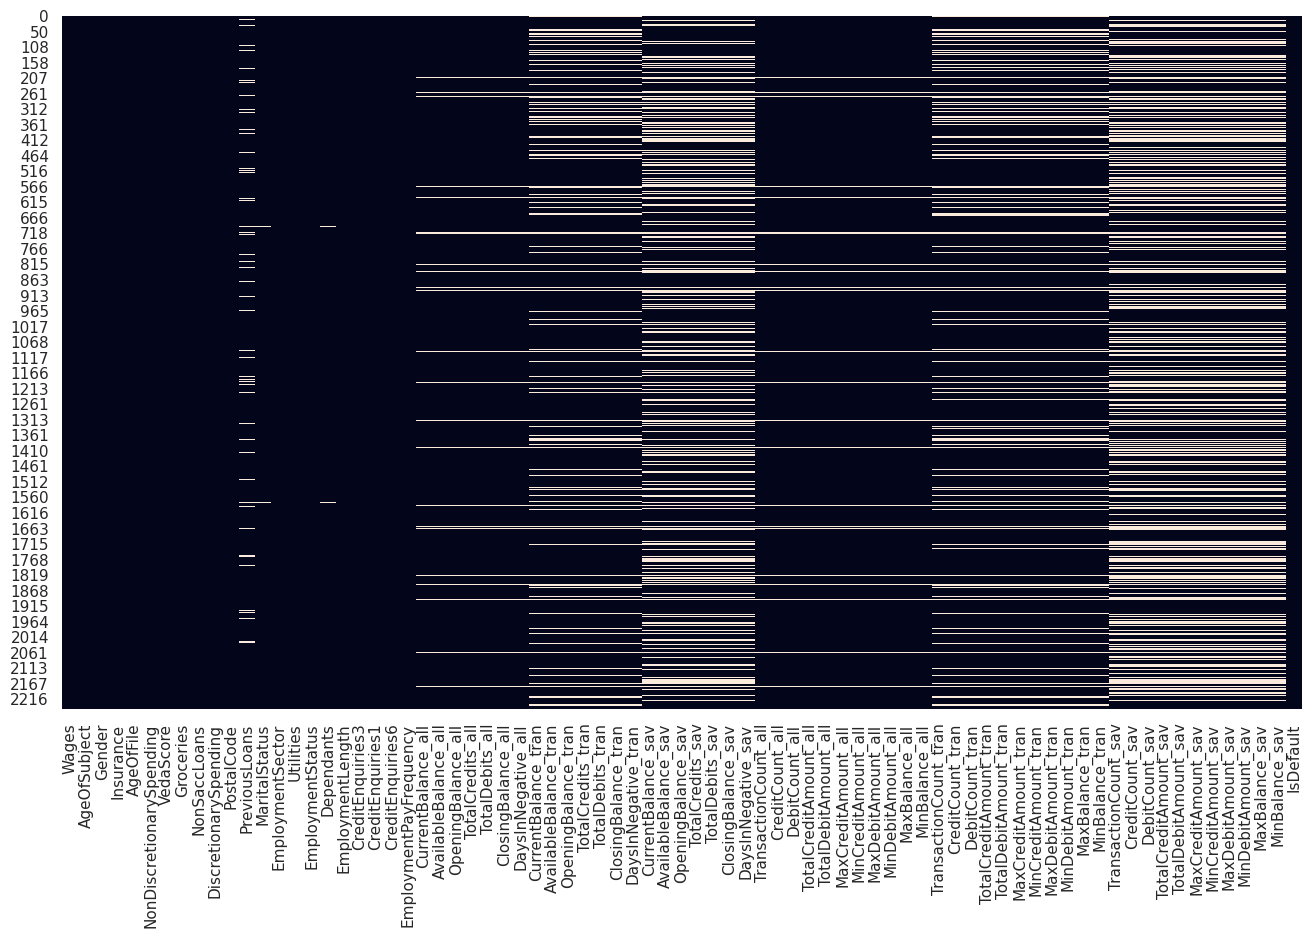

In [ ]:
#Checking number of null values in each column
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull(), cbar=False)
df.isna().sum().to_frame(name="Null Count").T

### Removing columns with more than 50% of null values (if any)

In [ ]:
#count half point of the dataset.
half_point = len(df) / 2
df = df.dropna(thresh=half_point, axis=1)
print ("New shape = ",df.shape)

New shape =  (2008, 77)


### Removing Duplicate values (if any)

In [ ]:
df.drop_duplicates()
print ("New shape = ",df.shape)

New shape =  (2008, 77)


### Missing Value Imputation


*****
Numerical column imputation with mean
*****


*****
Categorical column imputation with mode
*****

Missing value imputation done.


,Wages,AgeOfSubject,Gender,Insurance,AgeOfFile,NonDiscretionarySpending,VedaScore,Groceries,NonSaccLoans,DiscretionarySpending,PostalCode,PreviousLoans,MaritalStatus,EmploymentSector,Utilities,EmploymentStatus,Dependants,EmploymentLength,CreditEnquiries3,CreditEnquiries1,CreditEnquiries6,EmploymentPayFrequency,CurrentBalance_all,AvailableBalance_all,OpeningBalance_all,TotalCredits_all,TotalDebits_all,ClosingBalance_all,DaysInNegative_all,CurrentBalance_tran,AvailableBalance_tran,OpeningBalance_tran,TotalCredits_tran,TotalDebits_tran,ClosingBalance_tran,DaysInNegative_tran,CurrentBalance_sav,AvailableBalance_sav,OpeningBalance_sav,TotalCredits_sav,TotalDebits_sav,ClosingBalance_sav,DaysInNegative_sav,TransactionCount_all,CreditCount_all,DebitCount_all,TotalCreditAmount_all,TotalDebitAmount_all,MaxCreditAmount_all,MinCreditAmount_all,MaxDebitAmount_all,MinDebitAmount_all,MaxBalance_all,MinBalance_all,TransactionCount_tran,CreditCount_tran,DebitCount_tran,TotalCreditAmount_tran,TotalDebitAmount_tran,MaxCreditAmount_tran,MinCreditAmount_tran,MaxDebitAmount_tran,MinDebitAmount_tran,MaxBalance_tran,MinBalance_tran,TransactionCount_sav,CreditCount_sav,DebitCount_sav,TotalCreditAmount_sav,TotalDebitAmount_sav,MaxCreditAmount_sav,MinCreditAmount_sav,MaxDebitAmount_sav,MinDebitAmount_sav,MaxBalance_sav,MinBalance_sav,IsDefault
Null Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


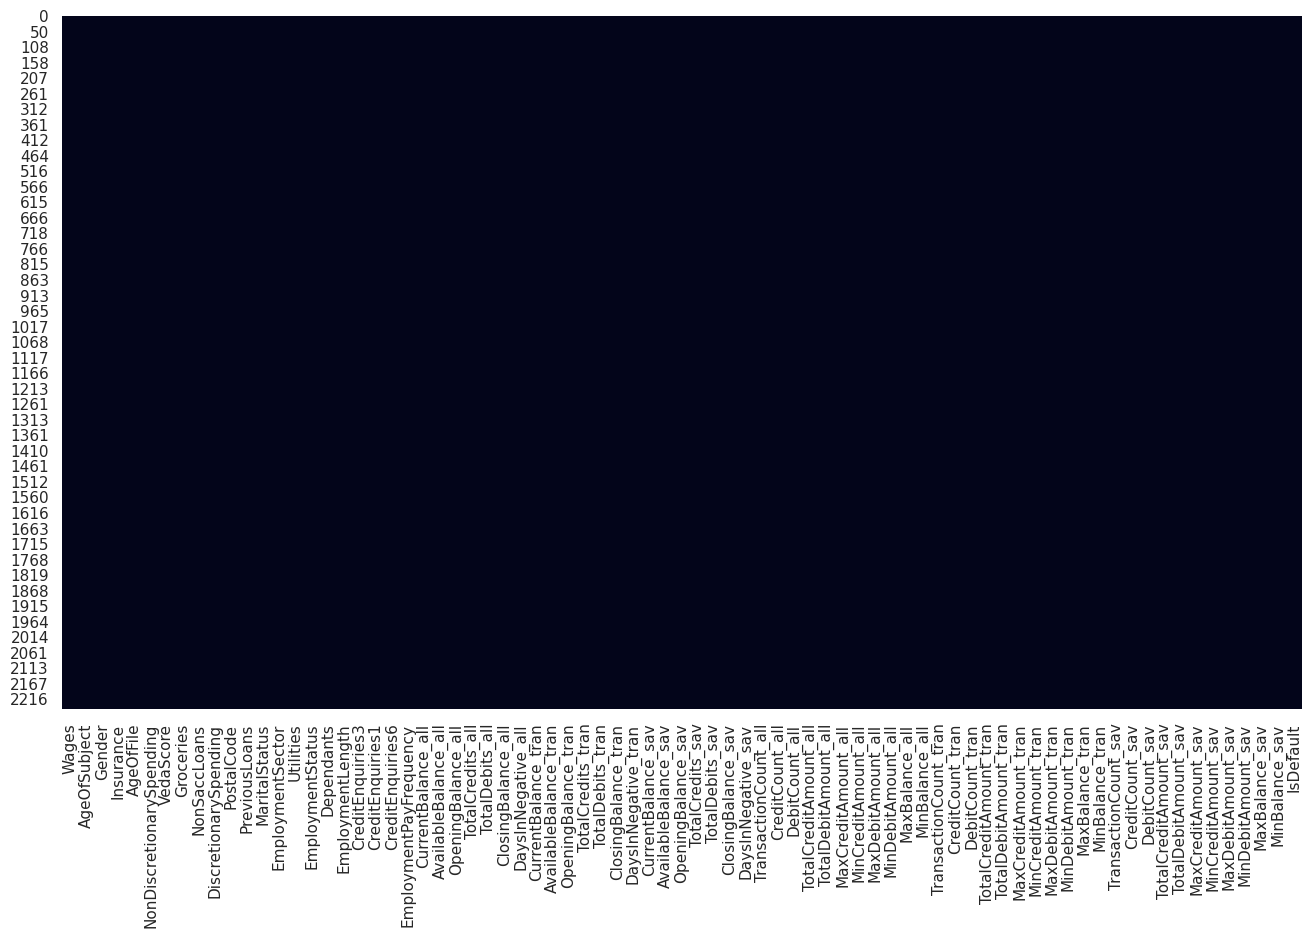

In [ ]:
print("\n*****")
print("Numerical column imputation with mean")
print("*****\n")
for col in numerical_columns:
    #print('Imputation with Median: %s' % (col))
    df[col].fillna(df[col].mean(), inplace=True)

print("\n*****")
print("Categorical column imputation with mode")
print("*****\n")

for col in categorical_columns[:-1]:
    #print('Imputation with Mode: %s' % (col))
    df[col].fillna(df[col].mode()[0], inplace=True)

print('Missing value imputation done.')

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull(), cbar=False)
df.isna().sum().to_frame(name="Null Count").T

All the null vaues have been imputed now. Hence, our dataset is having no null values now.

### Target class distribution

\nSummary Statistics for Age:
count   2008.000
mean      38.157
std       11.836
min       19.818
25%       28.589
50%       35.896
75%       46.226
max      118.533
Name: AgeOfSubject_Years, dtype: float64


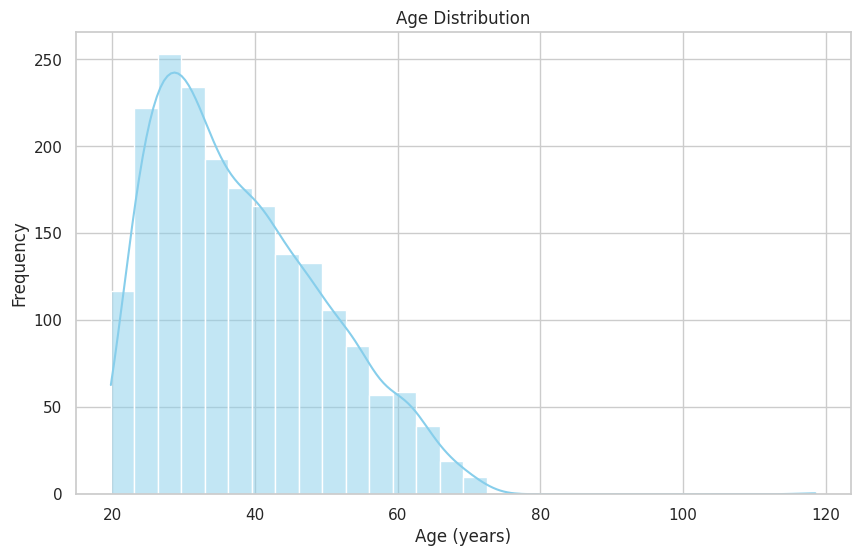

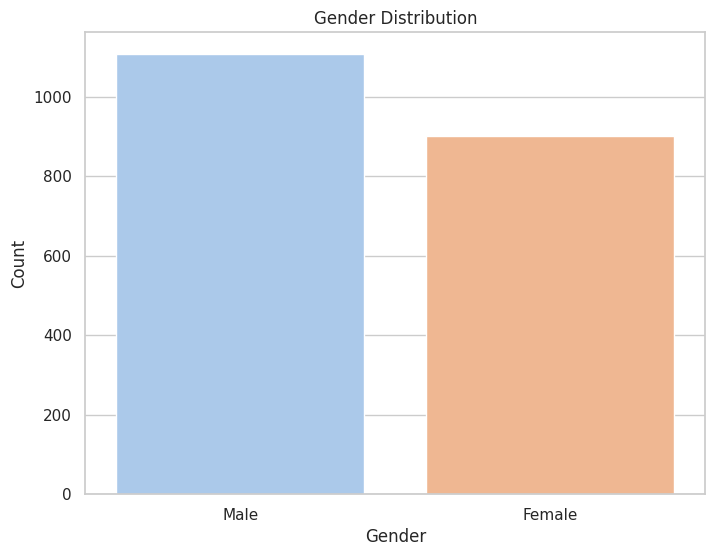

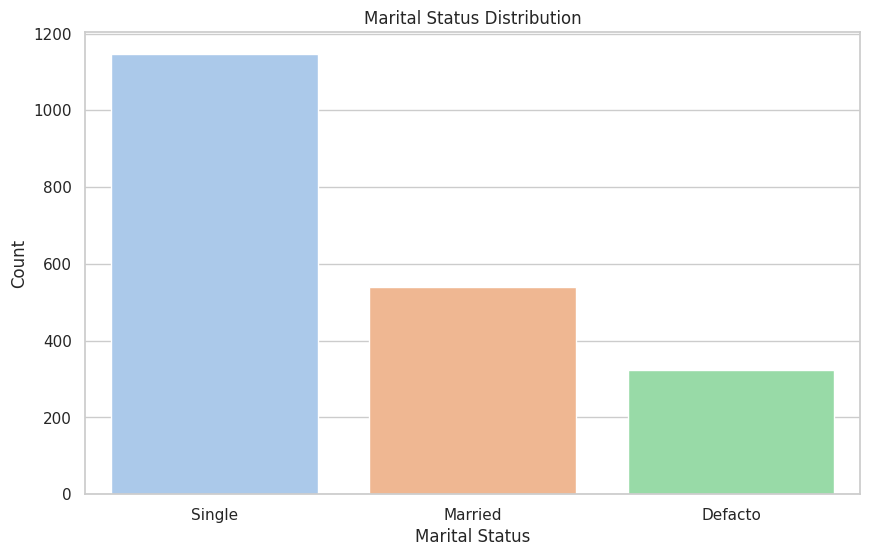

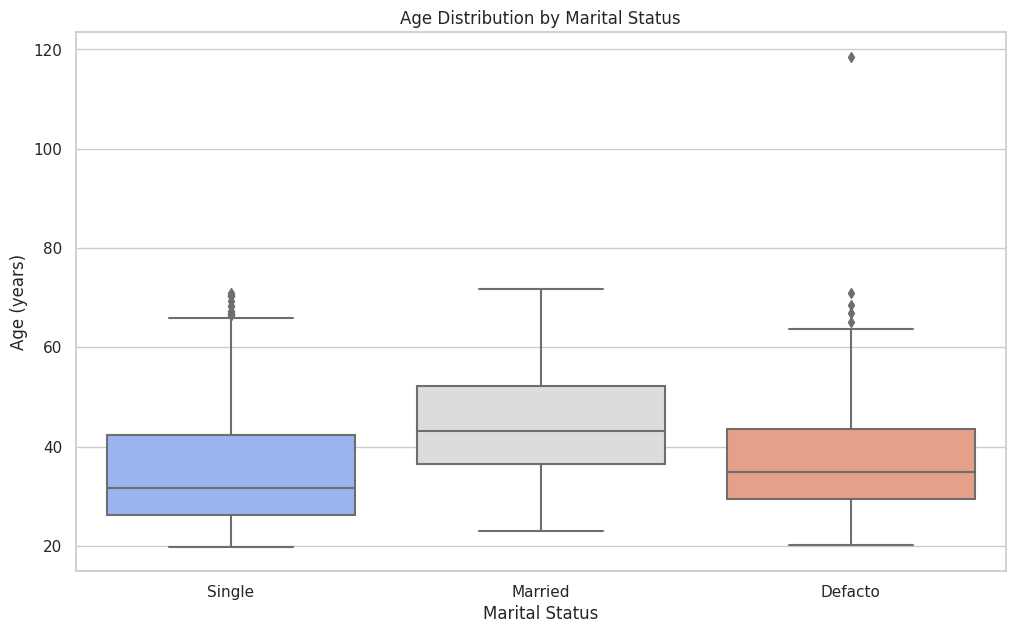

In [ ]:
df['AgeOfSubject_Years'] = df['AgeOfSubject'] / 12

# Generating summary statistics for demographic data
print("\\nSummary Statistics for Age:")
print(df['AgeOfSubject_Years'].describe())

# Visualizations for Demographic Data

# Setting aesthetic parameters
sns.set(style="whitegrid")

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AgeOfSubject_Years'], kde=True, color='skyblue', bins=30)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

# Define the female identifiers
female_identifiers = ["Ms.", "Miss", "Mrs."]  # Add all female identifiers

# Replace the female values with "Female"
df['Gender'] = df['Gender'].replace(female_identifiers, "Female")

# Replace "Mr." with "Male"
df['Gender'] = df['Gender'].replace(["Mr."], "Male")

# Now, the 'Gender' column has simplified categories ("Female" and "Male"), and you can plot it
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', data=df, palette='pastel')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Boxplot for Age by Marital Status - to understand the relationship between age and marital status
plt.figure(figsize=(12, 7))
sns.boxplot(x='MaritalStatus', y='AgeOfSubject_Years', data=df, palette='coolwarm')
plt.title('Age Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age (years)')
plt.show()

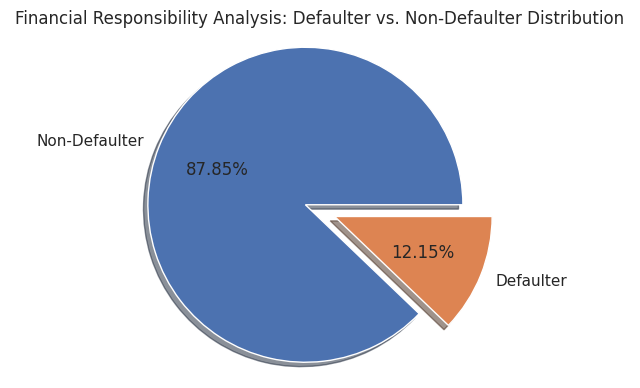

In [ ]:
# plot pie chart
plt.figure(figsize=(8,4.5))
explode = (0.2, 0)  # only "explode" the 1st slice.
labels = ["Non-Defaulter", "Defaulter"]
sizes = df["IsDefault"].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, explode=explode)
plt.axis('equal')
plt.title('Financial Responsibility Analysis: Defaulter vs. Non-Defaulter Distribution')
plt.show()

Imbalance can be seen in target class distribution.

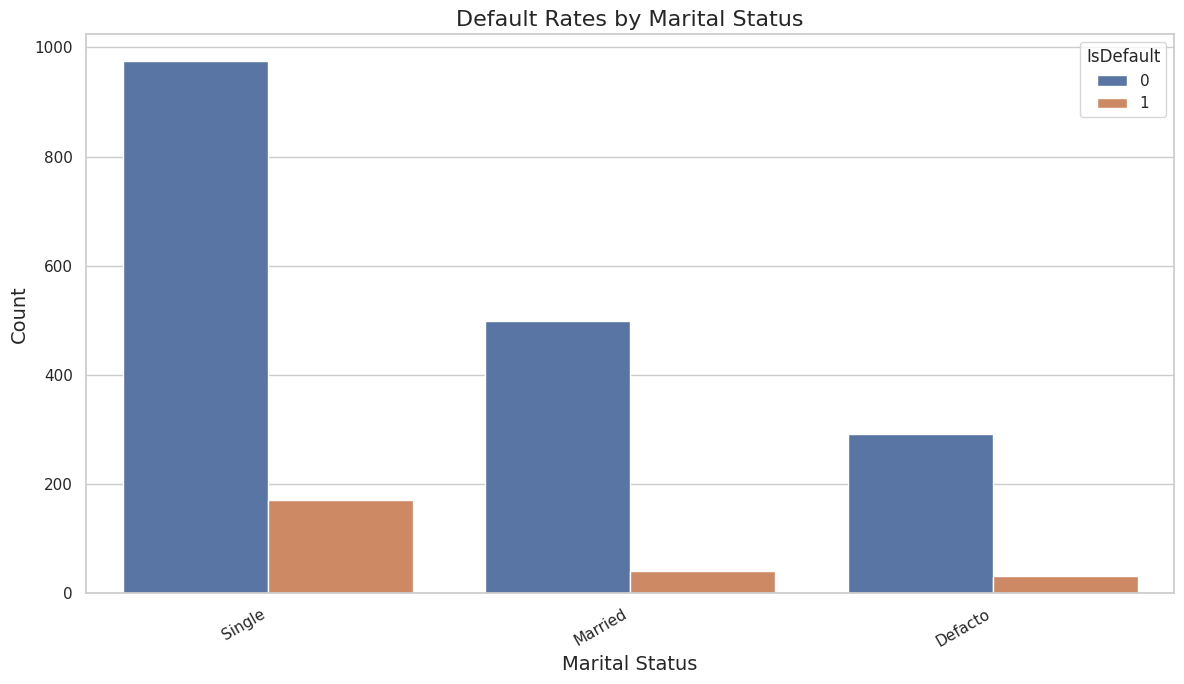

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))  # Adjusting the size for better readability

# Create a count plot with 'MaritalStatus' on the x-axis and 'IsDefault' as the hue
sns.countplot(data=df, x='MaritalStatus', hue='IsDefault', palette='deep', ax=ax)  # 'deep' is a color palette

# Rotate the x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')  # Rotates labels and aligns them right

# Setting the title and labels
ax.set_title("Default Rates by Marital Status", fontsize=16)
ax.set_xlabel('Marital Status', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

**Note**: Some data inconsistency can be seen here. "Miss." and "Ms." are the same thing but have been assigned two distinct categories.

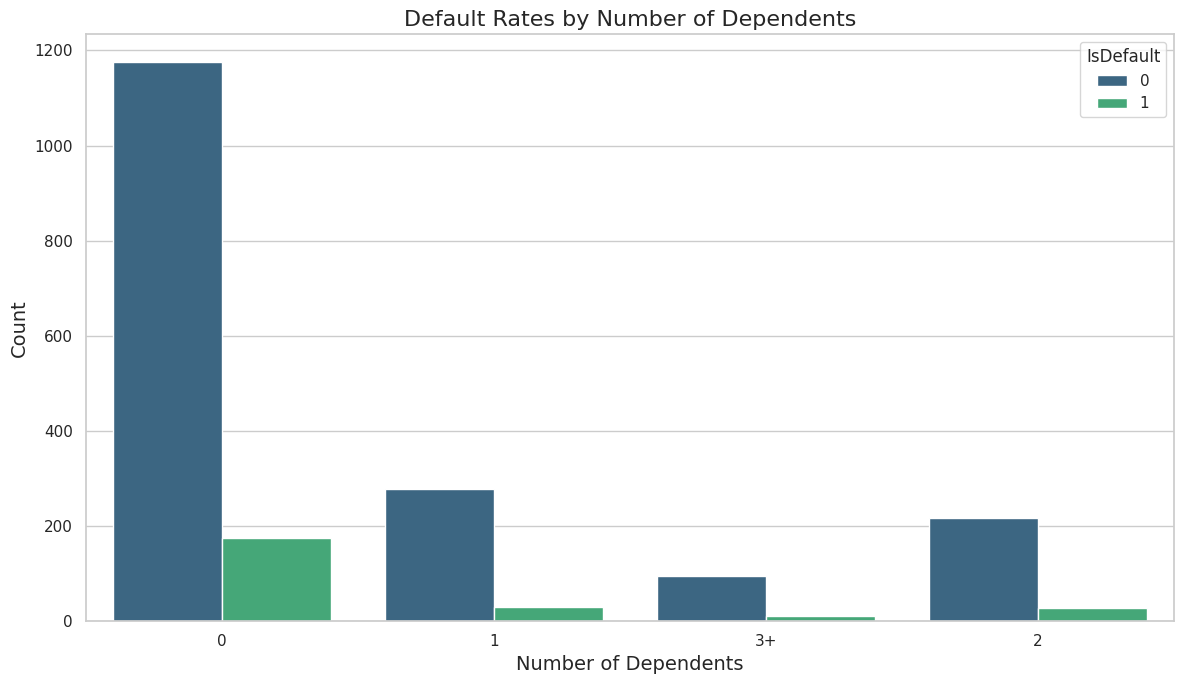

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))  # Adjusting the size for better readability

# Create a count plot with 'Dependants' on the x-axis and 'IsDefault' as the hue
sns.countplot(data=df, x='Dependants', hue='IsDefault', palette='viridis', ax=ax)  # 'viridis' is a color palette

# Rotate the x-axis labels if there are many categories (many unique values for dependents) for readability
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')  # Uncomment if necessary

# Setting the title and labels
ax.set_title("Default Rates by Number of Dependents", fontsize=16)
ax.set_xlabel('Number of Dependents', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

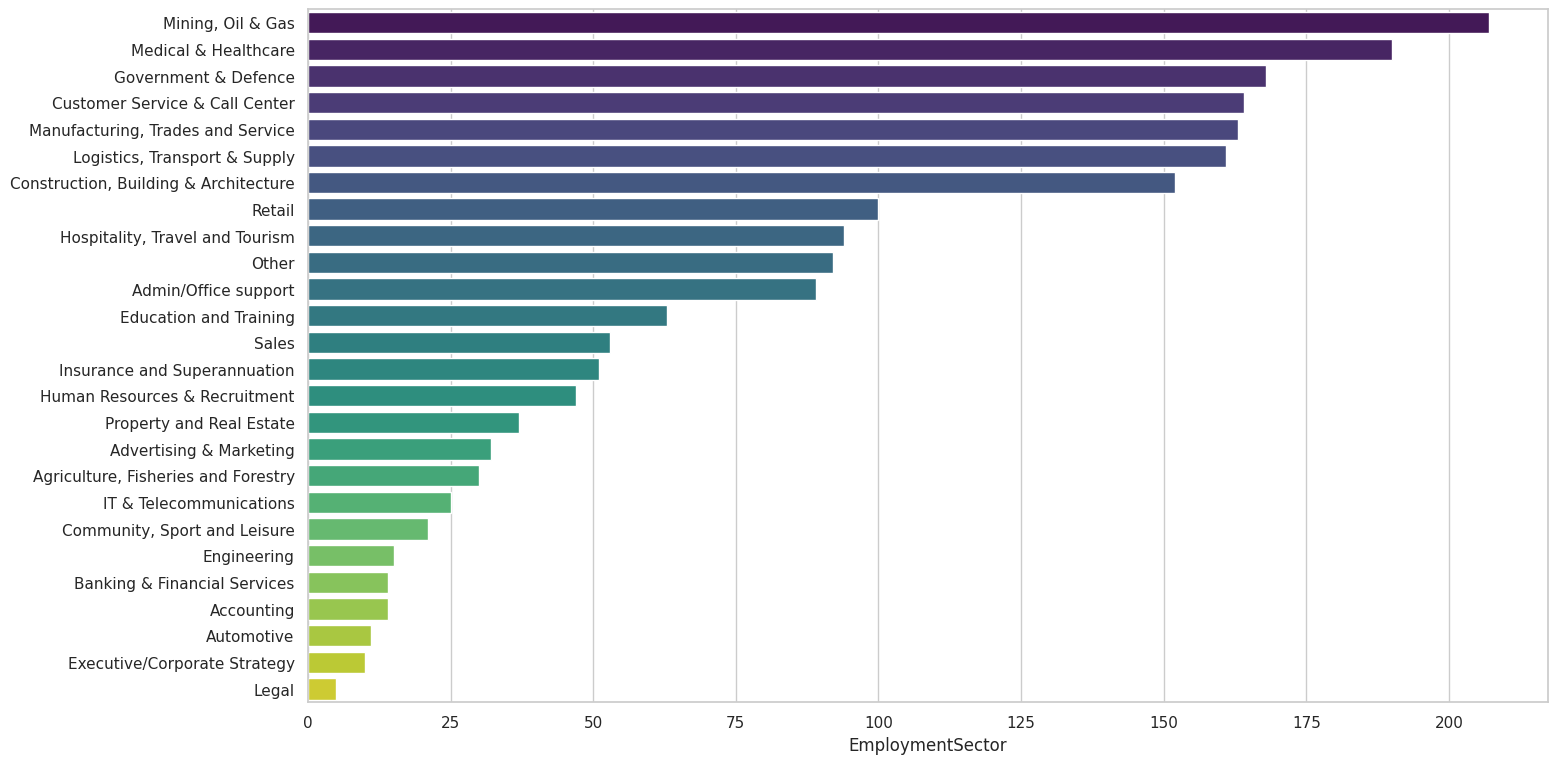

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=df["EmploymentSector"].value_counts(), y=df["EmploymentSector"].unique(), data=df, palette='viridis')

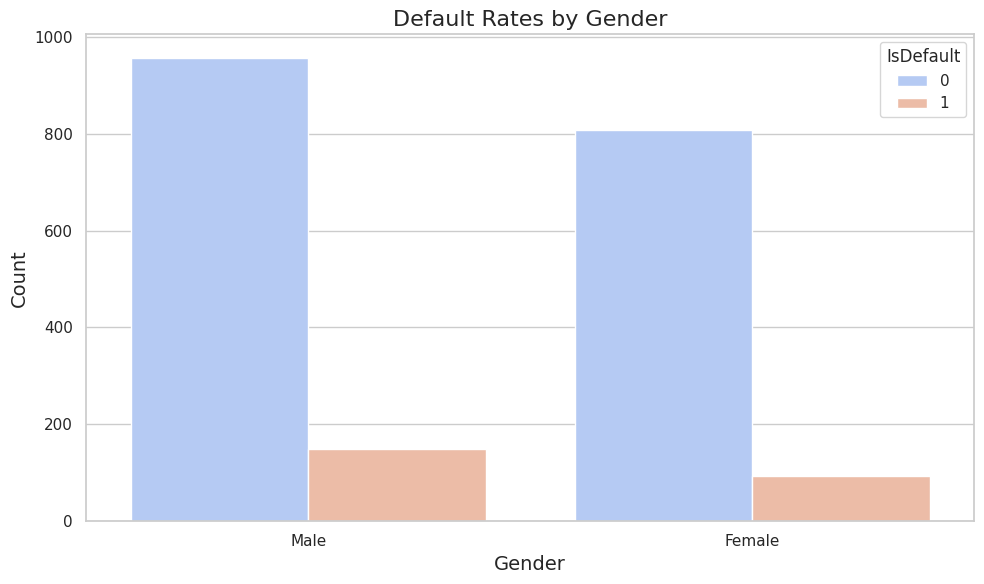

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))  # Adjusting the size for better readability

# Create a bar plot with 'Gender' on the x-axis and 'IsDefault' as the hue
sns.countplot(data=df, x='Gender', hue='IsDefault', palette='coolwarm', ax=ax)  # 'coolwarm' is a color palette

# If the gender categories are 'Male' and 'Female', no rotation is needed. If there are more categories, you might need to rotate the labels.
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')  # Uncomment if necessary

# Setting the title and labels
ax.set_title("Default Rates by Gender", fontsize=16)
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

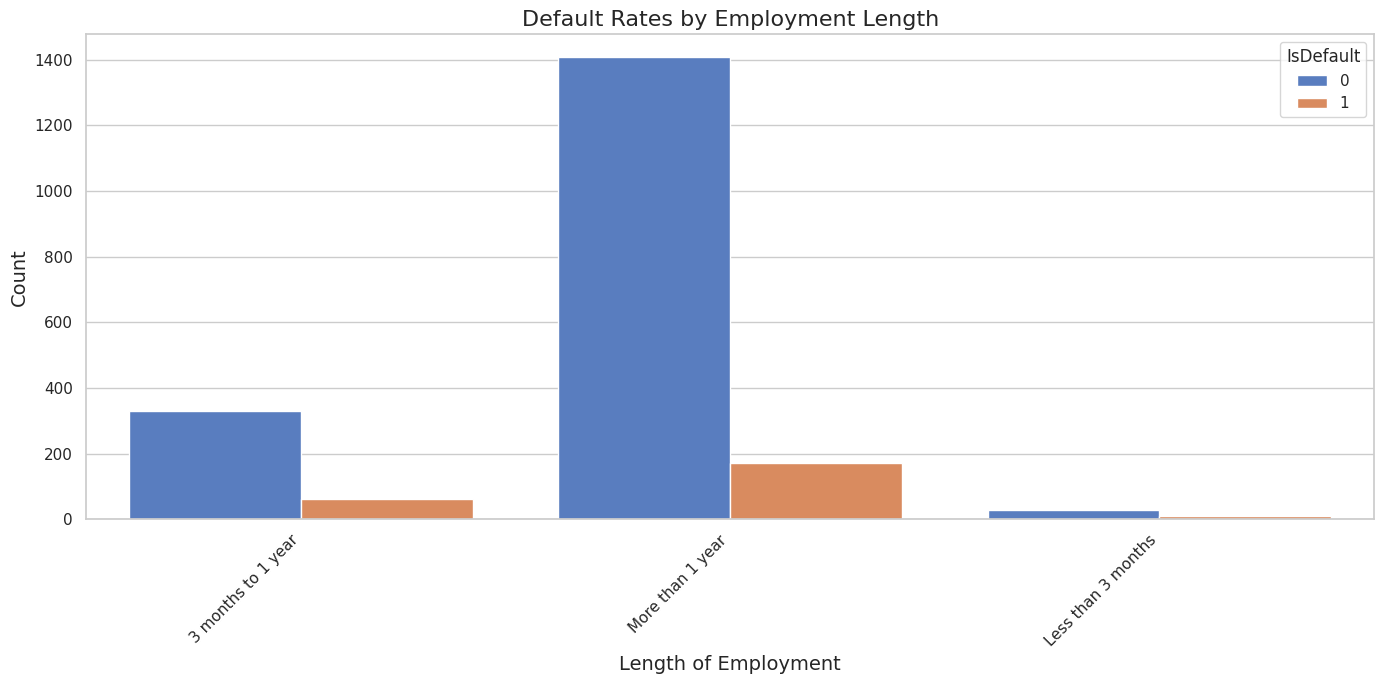

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 7))  # Adjusting the size for better readability

# Create a count plot with 'EmploymentLength' on the x-axis and 'IsDefault' as the hue
sns.countplot(data=df, x='EmploymentLength', hue='IsDefault', palette='muted', ax=ax)  # 'muted' is a color palette

# Rotate the x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotates labels and aligns them right

# Setting the title and labels
ax.set_title("Default Rates by Employment Length", fontsize=16)
ax.set_xlabel('Length of Employment', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()


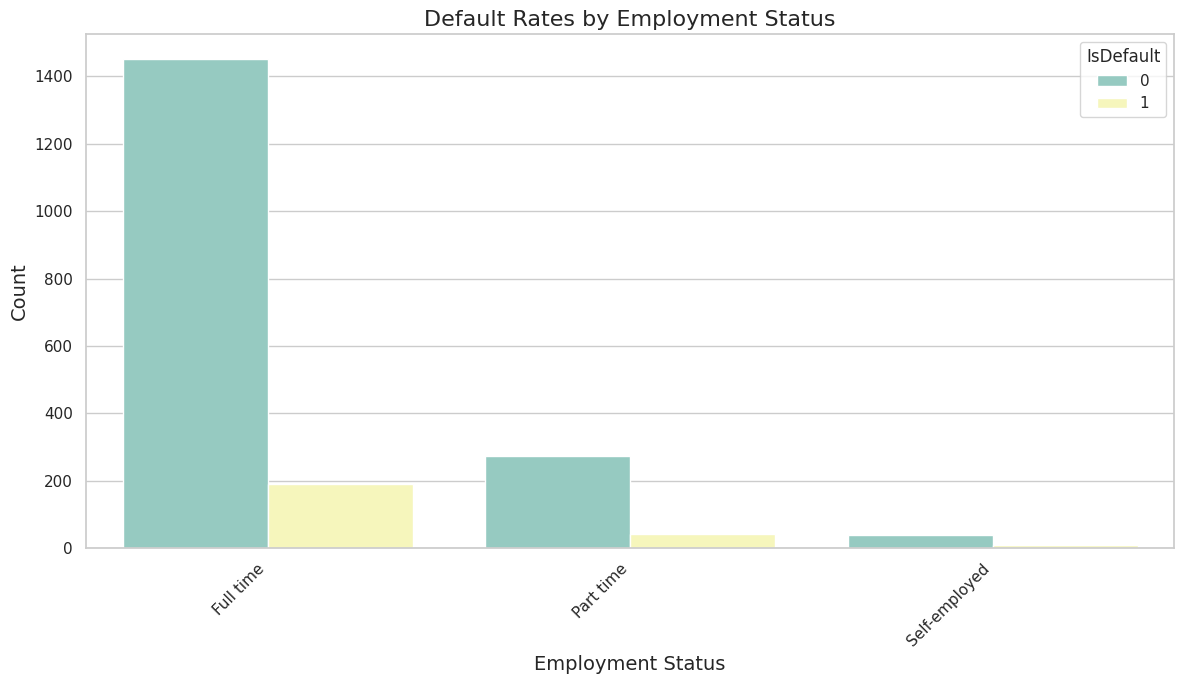

In [ ]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 7))  # Adjusting the size for better readability

# Create a count plot with 'EmploymentStatus' on the x-axis and 'IsDefault' as the hue
sns.countplot(data=df, x='EmploymentStatus', hue='IsDefault', palette='Set3', ax=ax)

# Rotate the x-axis labels for readability, if necessary
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotates labels and aligns them right

# Setting the title and labels
ax.set_title("Default Rates by Employment Status", fontsize=16)
ax.set_xlabel('Employment Status', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

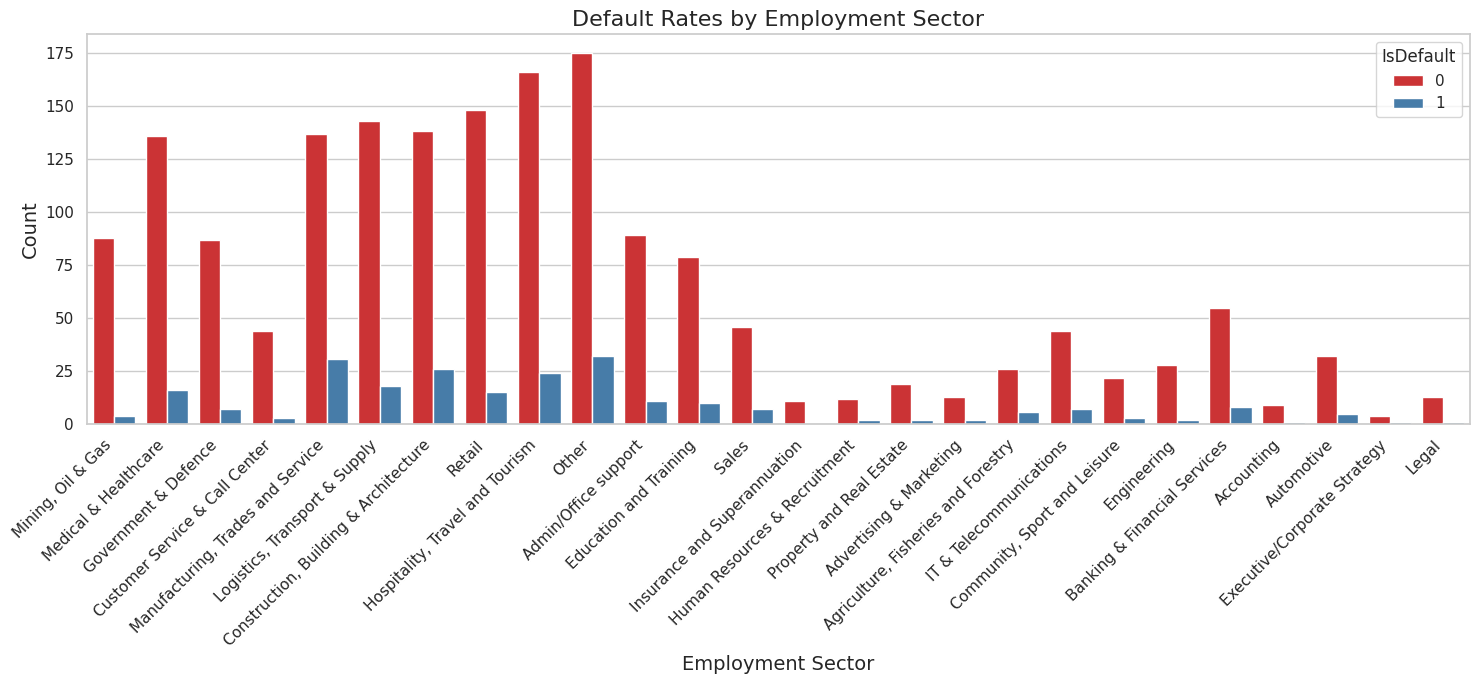

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 7))  # Adjusting the size for better readability

# Create a count plot for the 'EmploymentSector' with 'IsDefault' as the hue
sns.countplot(data=df, x='EmploymentSector', hue='IsDefault', palette='Set1', ax=ax)

# Rotate the x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # 'ha' is the alignment argument

# Setting the title and labels
ax.set_title("Default Rates by Employment Sector", fontsize=16)
ax.set_xlabel('Employment Sector', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()


<Axes: xlabel='EmploymentStatus', ylabel='Wages'>

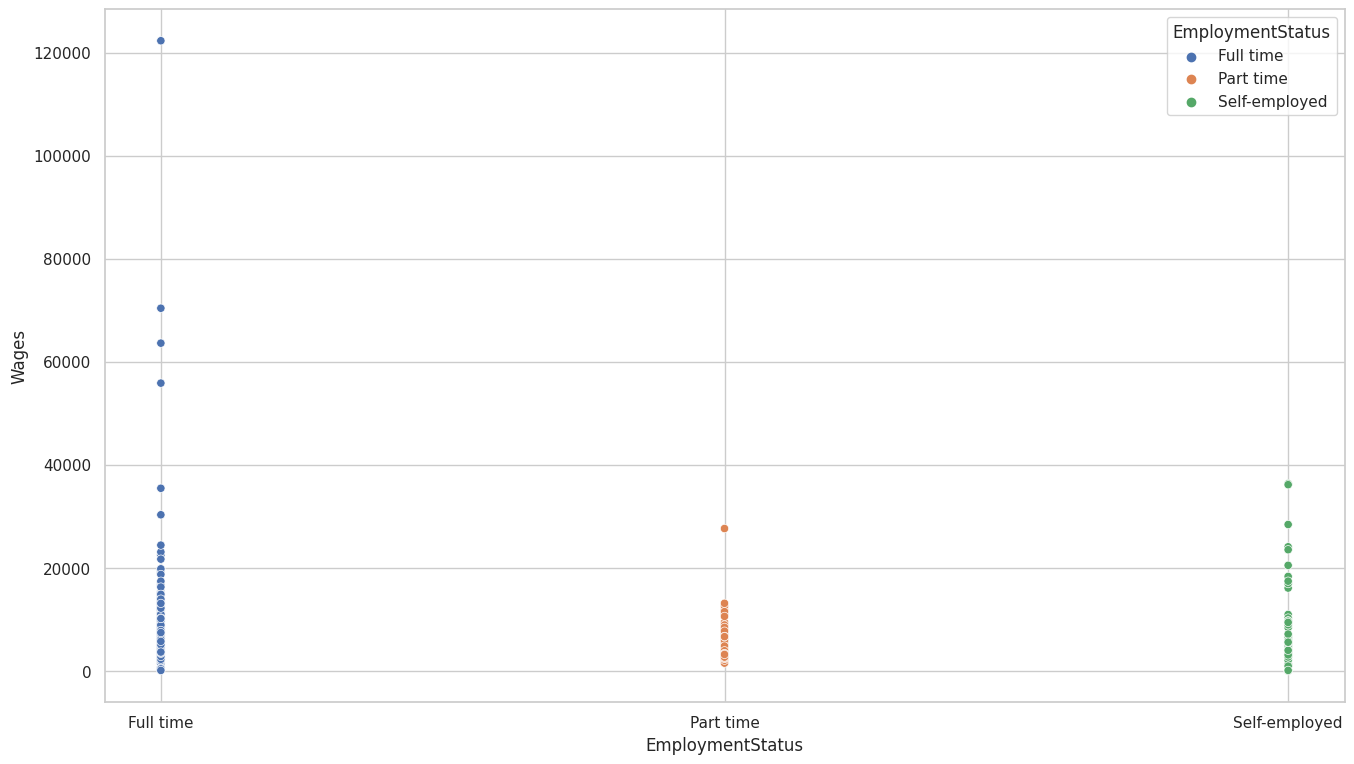

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(x="EmploymentStatus",y="Wages",data=df, hue="EmploymentStatus")

## Handling Outliers

<ipython-input-60-ebfa7eab42de>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Wages"], hist=True, kde=True,


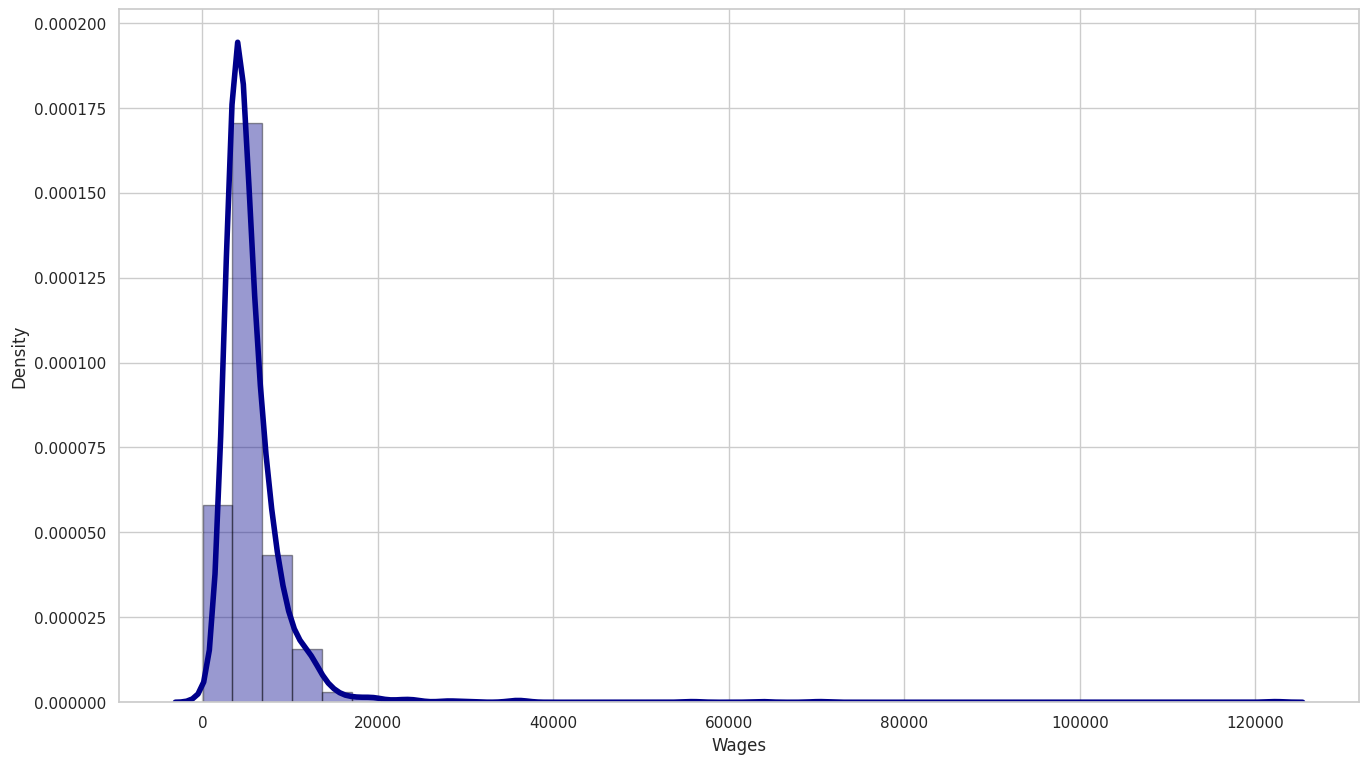

<ipython-input-60-ebfa7eab42de>:10: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().to_frame(name="Skewness Value").T #This will tell us the magnitude and direction of skewness.
<ipython-input-60-ebfa7eab42de>:16: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().to_frame(name="Skewness Value").T #This will tell us the magnitude and direction of skewness.


,Wages,AgeOfSubject,Insurance,AgeOfFile,NonDiscretionarySpending,VedaScore,Groceries,NonSaccLoans,DiscretionarySpending,PostalCode,PreviousLoans,Utilities,CreditEnquiries3,CreditEnquiries1,CreditEnquiries6,CurrentBalance_all,AvailableBalance_all,OpeningBalance_all,TotalCredits_all,TotalDebits_all,ClosingBalance_all,DaysInNegative_all,CurrentBalance_tran,AvailableBalance_tran,OpeningBalance_tran,TotalCredits_tran,TotalDebits_tran,ClosingBalance_tran,DaysInNegative_tran,CurrentBalance_sav,AvailableBalance_sav,OpeningBalance_sav,TotalCredits_sav,TotalDebits_sav,ClosingBalance_sav,DaysInNegative_sav,TransactionCount_all,CreditCount_all,DebitCount_all,TotalCreditAmount_all,TotalDebitAmount_all,MaxCreditAmount_all,MinCreditAmount_all,MaxDebitAmount_all,MinDebitAmount_all,MaxBalance_all,MinBalance_all,TransactionCount_tran,CreditCount_tran,DebitCount_tran,TotalCreditAmount_tran,TotalDebitAmount_tran,MaxCreditAmount_tran,MinCreditAmount_tran,MaxDebitAmount_tran,MinDebitAmount_tran,MaxBalance_tran,MinBalance_tran,TransactionCount_sav,CreditCount_sav,DebitCount_sav,TotalCreditAmount_sav,TotalDebitAmount_sav,MaxCreditAmount_sav,MinCreditAmount_sav,MaxDebitAmount_sav,MinDebitAmount_sav,MaxBalance_sav,MinBalance_sav,IsDefault,AgeOfSubject_Years
Skewness Value,11.225,0.747,11.549,0.978,6.927,0.365,2.738,2.883,4.866,0.666,1.515,5.721,1.926,1.563,1.990,-5.130,-32.624,-5.362,9.925,0.499,-5.239,3.676,-5.045,14.273,-5.562,11.805,-2.041,-4.858,4.440,-25.899,22.659,-22.089,14.691,-10.828,-25.849,6.938,11.984,5.221,14.375,8.775,-8.994,12.193,8.839,-35.378,-33.718,14.267,-4.596,2.746,3.339,2.951,10.457,-10.356,12.740,21.893,-14.427,-19.917,11.078,-11.225,7.511,13.735,5.953,12.522,-11.549,12.919,29.214,-12.937,-29.185,-15.731,-27.045,2.319,0.747


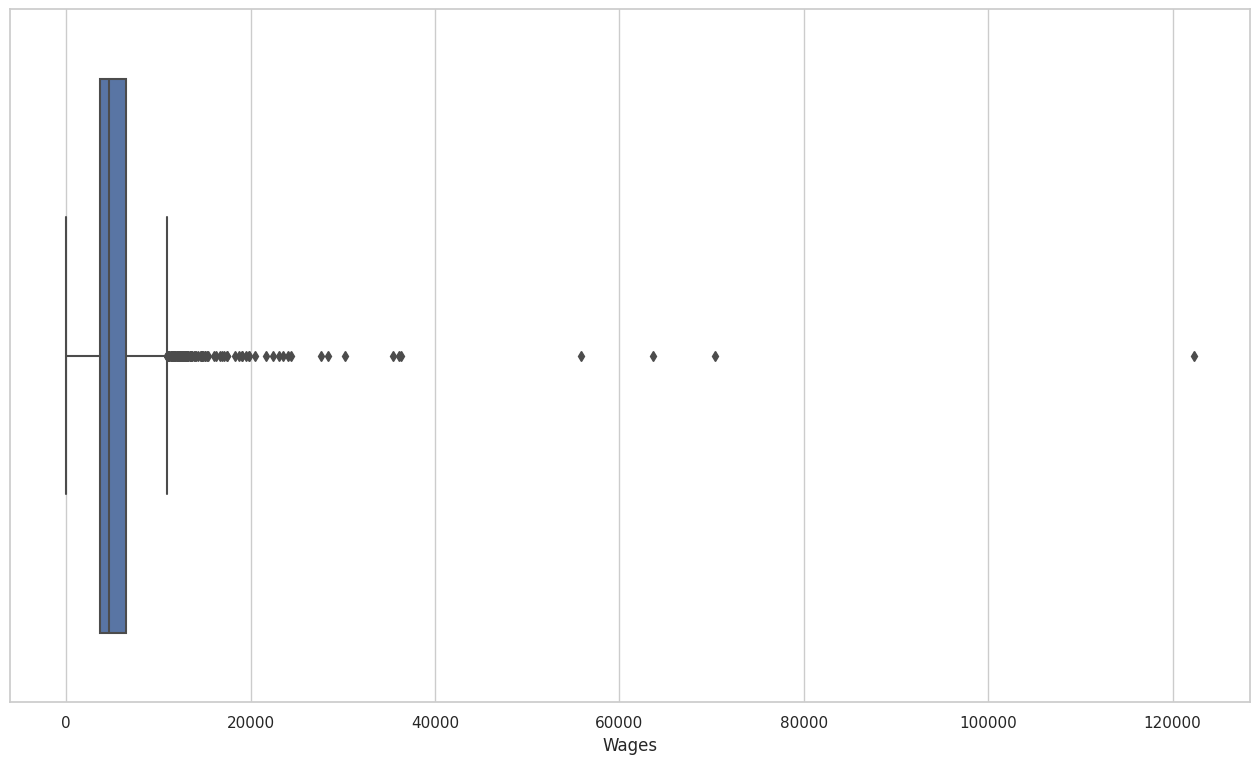

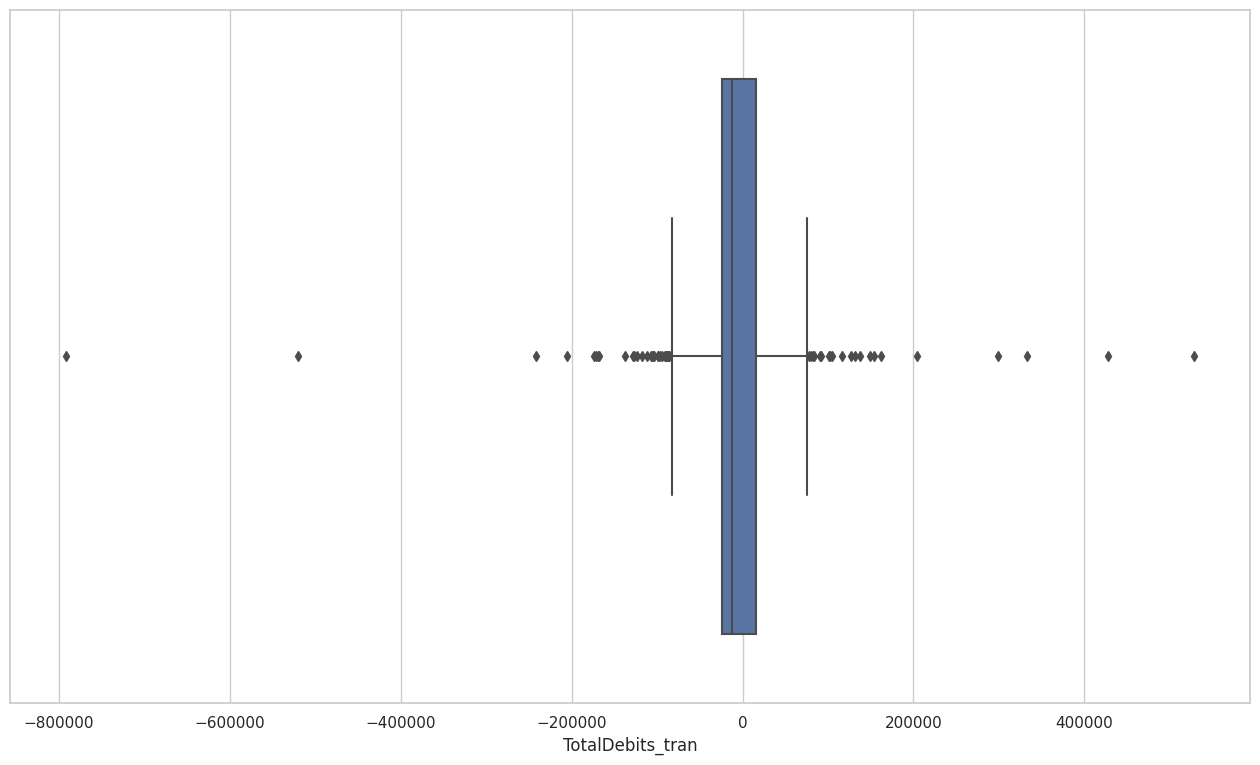

In [ ]:
plt.figure(figsize=(16,9))
sns.distplot(df["Wages"], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()
plt.figure(figsize=(16,9))
sns.boxplot(x=df["Wages"]) #Box pl0t
df.skew().to_frame(name="Skewness Value").T #This will tell us the magnitude and direction of skewness.

#AvailableBalance_all

plt.figure(figsize=(16,9))
sns.boxplot(x=df["TotalDebits_tran"]) #Box pl0t
df.skew().to_frame(name="Skewness Value").T #This will tell us the magnitude and direction of skewness.

If we look at the skewness value of the variables, most of the variables are either right skewed or left skewed because of outliers present in the dataset. For example, if we look at the distribution curve of Wages, it is right skewed due to some high magnitude values present on the right side of the curve. It can aslo be seen from the box plot of Wages variable.
There are several techniques which can be used to remove the outliers. Some of them are listed below:

1. Removal of outliers based on z-score threshold
2. Removal of outliers based on Inter Quartile Range score
3. Quantile based trimming
4. Quantile based flooring and capping
5. Log Transformation of outliers
6. Replacing outliers with median

The first three methods can't be used due to small number of samples in our dataset. Using these methods will further reduce our dataset size. As shown in below cell,  IQR score has been used to remove outliers which removes everything outside the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) and thus reducing our dataset to 286 samples only. Hence, outliers removal is not a suitable approach considering the sample size.

In [ ]:
#Removal of outliers based on Inter Quartile Range score
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape after outliers removal: ",df_out.shape)

Shape after outliers removal:  (290, 78)


<ipython-input-61-a2ae12bddd72>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-61-a2ae12bddd72>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-61-a2ae12bddd72>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


Replacing outliers with median would alter the information in our dataset. Hence, I decided to use log transformation to minimixe the skewness in our dataset without dropping any samples.

<ipython-input-62-b1149c847dae>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Wages"], hist=True, kde=True,
<ipython-input-62-b1149c847dae>:9: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().to_frame(name="Skewness value").T


,Wages,AgeOfSubject,Insurance,AgeOfFile,NonDiscretionarySpending,VedaScore,Groceries,NonSaccLoans,DiscretionarySpending,PostalCode,PreviousLoans,Utilities,CreditEnquiries3,CreditEnquiries1,CreditEnquiries6,CurrentBalance_all,AvailableBalance_all,OpeningBalance_all,TotalCredits_all,TotalDebits_all,ClosingBalance_all,DaysInNegative_all,CurrentBalance_tran,AvailableBalance_tran,OpeningBalance_tran,TotalCredits_tran,TotalDebits_tran,ClosingBalance_tran,DaysInNegative_tran,CurrentBalance_sav,AvailableBalance_sav,OpeningBalance_sav,TotalCredits_sav,TotalDebits_sav,ClosingBalance_sav,DaysInNegative_sav,TransactionCount_all,CreditCount_all,DebitCount_all,TotalCreditAmount_all,TotalDebitAmount_all,MaxCreditAmount_all,MinCreditAmount_all,MaxDebitAmount_all,MinDebitAmount_all,MaxBalance_all,MinBalance_all,TransactionCount_tran,CreditCount_tran,DebitCount_tran,TotalCreditAmount_tran,TotalDebitAmount_tran,MaxCreditAmount_tran,MinCreditAmount_tran,MaxDebitAmount_tran,MinDebitAmount_tran,MaxBalance_tran,MinBalance_tran,TransactionCount_sav,CreditCount_sav,DebitCount_sav,TotalCreditAmount_sav,TotalDebitAmount_sav,MaxCreditAmount_sav,MinCreditAmount_sav,MaxDebitAmount_sav,MinDebitAmount_sav,MaxBalance_sav,MinBalance_sav,IsDefault,AgeOfSubject_Years
Skewness value,-0.964,0.158,-0.108,-1.703,-3.622,-0.350,-1.799,-1.076,0.163,-0.296,0.687,0.181,0.693,1.292,0.290,0.715,-0.790,0.419,0.775,0.845,0.588,0.304,-0.436,-0.647,-0.790,-6.579,0.860,-0.516,0.182,-0.399,-0.397,-0.597,-1.803,1.664,-0.421,2.408,0.262,0.026,0.184,0.744,0.000,0.913,0.470,0.000,0.000,0.281,4.164,-0.960,-0.249,-1.192,-0.058,0.000,0.526,-0.710,0.000,0.000,-3.433,2.536,-0.930,-0.789,-0.792,-3.067,0.000,-3.247,-0.196,0.000,0.000,-2.782,0.142,2.319,0.747


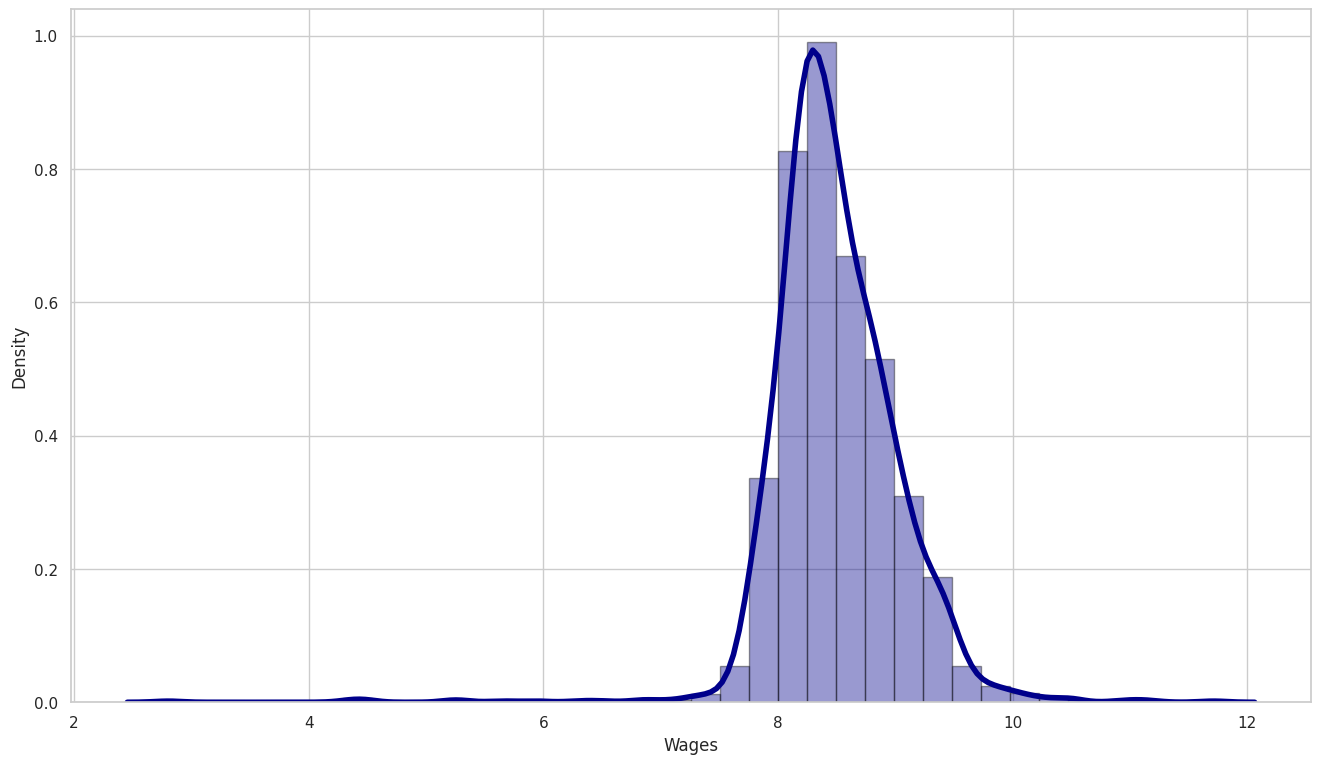

In [ ]:
# print (df["IsDefault"].unique())
for each_col in numerical_columns:
    df[each_col] = df[each_col].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(16,9))
sns.distplot(df["Wages"], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
df.skew().to_frame(name="Skewness value").T

This log transformation does not affect the smaller values but reduces the larger values in the dataset and thus we get a curve close to normal distribution.

## Data Cleansing

### Replacing values

In [ ]:
df["Gender"].replace(to_replace="Miss",value="Ms.",inplace=True)
df.drop("PostalCode",axis=1,inplace=True)
list(df["Gender"].unique())

['Male', 'Female']

### Transforming Categorical variables using One-Hot Encoding

In [ ]:
print ("Shape before transforming = ",df.shape)
df = pd.get_dummies(df,columns=["Gender"],drop_first=True)
df = pd.get_dummies(df,columns=["EmploymentPayFrequency"],drop_first=True)
df = pd.get_dummies(df,columns=["Dependants"],drop_first=True)
df = pd.get_dummies(df,columns=["MaritalStatus"],drop_first=True)
df = pd.get_dummies(df,columns=["EmploymentSector"],drop_first=True)
df = pd.get_dummies(df,columns=["EmploymentStatus"],drop_first=True)
df = pd.get_dummies(df,columns=["EmploymentLength"],drop_first=True)
print ("Shape after transforming = ",df.shape)
df.head()

Shape before transforming =  (2008, 77)
Shape after transforming =  (2008, 107)


,Wages,AgeOfSubject,Insurance,AgeOfFile,NonDiscretionarySpending,VedaScore,Groceries,NonSaccLoans,DiscretionarySpending,PreviousLoans,Utilities,CreditEnquiries3,CreditEnquiries1,CreditEnquiries6,CurrentBalance_all,AvailableBalance_all,OpeningBalance_all,TotalCredits_all,TotalDebits_all,ClosingBalance_all,DaysInNegative_all,CurrentBalance_tran,AvailableBalance_tran,OpeningBalance_tran,TotalCredits_tran,TotalDebits_tran,ClosingBalance_tran,DaysInNegative_tran,CurrentBalance_sav,AvailableBalance_sav,OpeningBalance_sav,TotalCredits_sav,TotalDebits_sav,ClosingBalance_sav,DaysInNegative_sav,TransactionCount_all,CreditCount_all,DebitCount_all,TotalCreditAmount_all,TotalDebitAmount_all,MaxCreditAmount_all,MinCreditAmount_all,MaxDebitAmount_all,MinDebitAmount_all,MaxBalance_all,MinBalance_all,TransactionCount_tran,CreditCount_tran,DebitCount_tran,TotalCreditAmount_tran,TotalDebitAmount_tran,MaxCreditAmount_tran,MinCreditAmount_tran,MaxDebitAmount_tran,MinDebitAmount_tran,MaxBalance_tran,MinBalance_tran,TransactionCount_sav,CreditCount_sav,DebitCount_sav,TotalCreditAmount_sav,TotalDebitAmount_sav,MaxCreditAmount_sav,MinCreditAmount_sav,MaxDebitAmount_sav,MinDebitAmount_sav,MaxBalance_sav,MinBalance_sav,IsDefault,AgeOfSubject_Years,Gender_Male,EmploymentPayFrequency_Monthly,EmploymentPayFrequency_Weekly,Dependants_1,Dependants_2,Dependants_3+,MaritalStatus_Married,MaritalStatus_Single,EmploymentSector_Admin/Office support,EmploymentSector_Advertising & Marketing,"EmploymentSector_Agriculture, Fisheries and Forestry",EmploymentSector_Automotive,EmploymentSector_Banking & Financial Services,"EmploymentSector_Community, Sport and Leisure","EmploymentSector_Construction, Building & Architecture",EmploymentSector_Customer Service & Call Center,EmploymentSector_Education and Training,EmploymentSector_Engineering,EmploymentSector_Executive/Corporate Strategy,EmploymentSector_Government & Defence,"EmploymentSector_Hospitality, Travel and Tourism",EmploymentSector_Human Resources & Recruitment,EmploymentSector_IT & Telecommunications,EmploymentSector_Insurance and Superannuation,EmploymentSector_Legal,"EmploymentSector_Logistics, Transport & Supply","EmploymentSector_Manufacturing, Trades and Service",EmploymentSector_Medical & Healthcare,"EmploymentSector_Mining, Oil & Gas",EmploymentSector_Other,EmploymentSector_Property and Real Estate,EmploymentSector_Retail,EmploymentSector_Sales,EmploymentStatus_Part time,EmploymentStatus_Self-employed,EmploymentLength_Less than 3 months,EmploymentLength_More than 1 year
0,8.514,6.403,3.342,5.408,6.488,6.217,5.488,5.797,6.118,0.000,0.000,1.099,1.099,1.792,0.000,-3.124,0.000,10.065,0.000,0.000,3.135,4.492,6.644,6.269,10.299,0.000,4.814,3.154,0.000,-3.124,7.155,9.889,0.000,0.000,3.135,5.707,4.290,5.421,10.065,0,7.943,-4.510,0,0,7.977,0.000,6.068,4.251,5.889,10.405,0,8.611,4.472,0,0,8.741,0.000,5.468,3.871,5.236,9.889,0,8.273,-3.817,0,0,8.298,0.000,0,50.318,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,8.241,6.407,0.000,4.425,7.415,6.248,6.587,6.328,7.012,0.000,5.734,1.099,0.693,1.386,0.000,-1.291,0.000,10.242,0.000,0.000,4.682,0.000,0.000,0.000,7.159,0.000,0.000,4.522,0.000,-1.291,3.975,10.195,0.000,0.000,2.773,6.016,4.419,5.781,10.242,0,7.674,-4.510,0,0,8.027,0.000,3.497,2.398,3.091,7.159,0,5.585,-0.399,0,0,0.000,0.000,5.932,4.277,5.710,10.195,0,7.926,-3.817,0,0,8.320,0.000,1,50.491,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,8.645,6.592,0.000,3.648,6.834,6.468,5.982,6.563,7.104,0.000,0.000,0.693,0.000,0.693,0.000,6.923,0.000,10.197,10.216,0.000,4.595,0.000,6.281,0.000,10.103,10.085,0.000,4.595,5.397,5.397,7.052,7.340,7.814,5.397,0.000,5.587,3.912,5.371,10.197,0,8.186,-3.411,0,0,8.256,0.000,5.429,3.555,5.257,10.103,0,8.329,4.315,0,0,7.923,0.000,2.996,2.398,2.197,7.340,0,5.394,-3.411,0,0,6.311,-0.540,0,60.750,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,8.380,5.786,0.000,2.749,7.741,6.194,5.649,6.079,7.341,0.000,5.252

In [ ]:
df.to_csv('Cleaned_dataset.csv')

## Feature selection

There are number of feature selection techniques that cane used to slect the best features to train the model. Some of them are shown below.

1. Remove features with low-variance
2. Remove features which are not correlated with the response variable
3. K-Best Fit
4. Recursive Feature Elimination
5. Recursive Feature Elimination with Cross-Validation
6. Prinicipal Component Analysis (PCA)
7. Feature Importance of Tree-based classifiers

I am going to try these one by one and will train all the following models with selected features.

In [ ]:
X,y = df.drop("IsDefault",axis=1,inplace=False),df["IsDefault"]

###1. Remove features with low-variance
# var = VarianceThreshold(threshold=0.3)
# var = var.fit(X,y)
# cols = var.get_support(indices=True)
# features = list(X.columns[cols])
# df = df[features]
# df.shape

###2. Remove features which are not correlated with the response variable
# cor_target = abs(df.corr()["IsDefault"])
# features = cor_target[cor_target>0.1]
# df = df[features.index]
# df.shape

###3. K-Best Fit
KBest = SelectKBest(score_func = chi2, k = 25)
columns = X.columns
Z = preprocessing.MinMaxScaler().fit_transform(X)
KBest = KBest.fit(Z,y)
cols = KBest.get_support(indices=True)
print(cols)
features = [ columns[i] for i in cols]
df = df[features]
df.shape

###4. Recursive Feature Elimination
# estimator = RandomForestClassifier(n_estimators=10, n_jobs=-1)
# rfe = RFE(estimator=estimator, n_features_to_select=25, step=1)
# RFeatures = rfe.fit(X, y)
# cols = rfe.get_support(indices=True)
# features = X.columns[cols]
# df = df[features]
# df.shape

###4. Recursive Feature Elimination with Cross-Validation
# print(df.shape)
# estimator = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state = 13)
# rfecv = RFECV(estimator, cv=5, n_jobs=-1, scoring='accuracy', min_features_to_select = 25)
# rfecv = rfecv.fit(X, y)
# cols = rfecv.get_support(indices=True)
# features = X.columns[cols]
# df = df[features]
# df.shape

###6. Prinicipal Component Analysis (PCA)
# scaler = preprocessing.MinMaxScaler(feature_range=[0, 1])
# X_rescaled = scaler.fit_transform(X)
# pca = PCA()
# pca = pca.fit(X_rescaled, y)
# xp = list(range(len(np.cumsum(pca.explained_variance_ratio_))))
# yp = np.cumsum(pca.explained_variance_ratio_)
# n_components = np.interp(0.95, yp, xp) + 1
# n_components = math.ceil(n_components)
# pca = PCA(n_components=n_components)
# pca = pca.fit(X, y)
# feature_matrix = pd.DataFrame(pca.fit_transform(X))
# X = feature_matrix

[  1   2   7  11  12  13  15  28  29  30  33  69  70  71  72  75  76  83
  88  95  97  98 103 104 105]


(2008, 25)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = preprocessing.StandardScaler().fit_transform(X.values)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
#from IPython.display import Image, display;
#display(Image(filename='/content/scikit.png'))

According to the chart provided by scikit-learn [[1]](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) and nature of our problem, I am first going to implement Linear SVC model. If that doesn't yield good results, then KNeighbours, SVC and other ensemble methods can be implemented.

Note: GridSearch algorithm can be used for each trained model to determine the best combination of model parameters. I have not included wide range of parameters in the parameter grid due to time constraint.

# Training

### Linear SVC

The best estimator is :  SVC(C=1, gamma=0.01, kernel='linear', probability=True)
Accuracy with best estimator :  0.736318407960199
Linear SVM Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.76      0.83       352
           1       0.25      0.58      0.35        50

    accuracy                           0.74       402
   macro avg       0.59      0.67      0.59       402
weighted avg       0.84      0.74      0.77       402



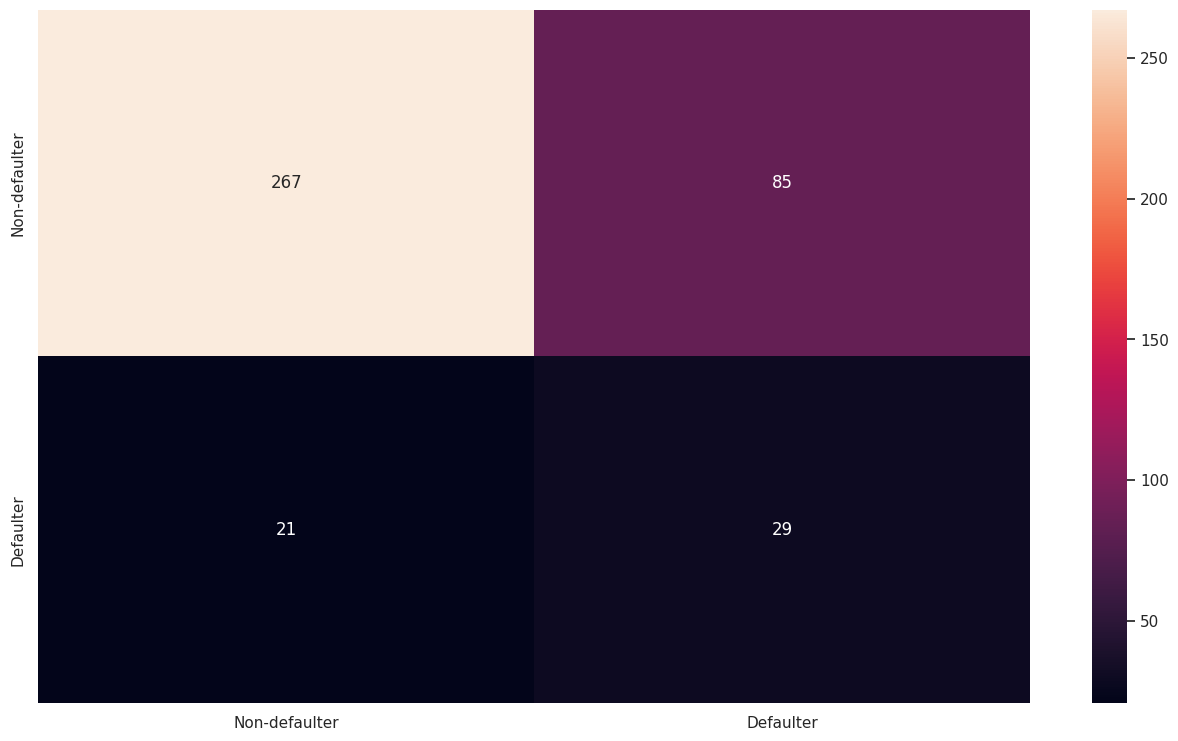

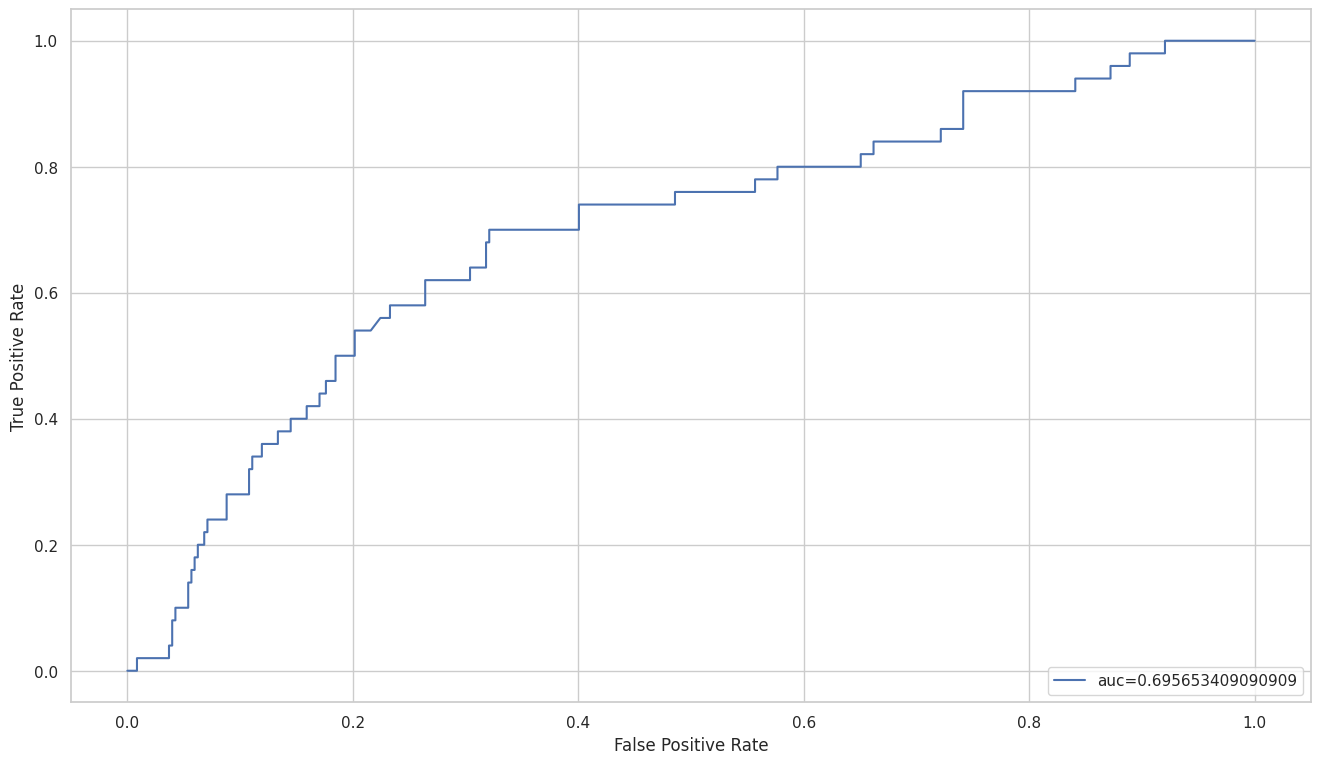

The average cross-validation score is 0.8784938271604937


In [ ]:
#model tuning
param_grid = [
  {'C': [1,10], 'gamma':[0.01,0.001],'kernel': ['linear']}
    ]
model_lsvc = svm.SVC(probability=True)
model_lsvc_gs = GridSearchCV(model_lsvc,param_grid,cv=2,n_jobs=-1)
model_lsvc_gs.fit(X_train_res, y_train_res)
print("The best estimator is : ",model_lsvc_gs.best_estimator_)

#Classification report
pred_cv_lsvc = model_lsvc_gs.best_estimator_.predict(X_test)
print ("Accuracy with best estimator : ",accuracy_score(y_test,pred_cv_lsvc))
print("Linear SVM Classification Report: \n",classification_report(y_test, pred_cv_lsvc, target_names=None))

#Confusion Matrix
plt.figure(figsize=(16,9))
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(confusion_matrix(y_test, pred_cv_lsvc),annot=True,fmt='2.5g',annot_kws=akws,\
            xticklabels=["Non-defaulter","Defaulter"],\
           yticklabels=["Non-defaulter","Defaulter"])
plt.show()

#ROC curve
probs = model_lsvc_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(16,9))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_lsvc_gs.best_estimator_,X,y,cv=25,n_jobs=-1)
print("The average cross-validation score is %s"%cv_scores.mean())

From these results, we can see that the model has a high precision but moderate recall for the majority class (non-defaulters), which is quite common in imbalanced datasets. The minority class (defaulters) has a low precision but a better-than-random recall, indicating that the model has some ability to identify defaulters, but there is a high chance of false positives.

Given that the recall for the defaulters is quite important in a default prediction context, the model does seem to have some utility. However, the low precision for the defaulters (22%) indicates that many of the customers predicted as defaulters would actually not default. This could be costly if the bank denies loans to these customers or costly if additional measures are taken due to the prediction.

The F1 score for defaulters is quite low, which means the model is not balancing precision and recall well for this class. However, the recall is more than 50%, which means the model is capturing more than half of the actual defaulters, but this comes at the cost of a high false positive rate.

### KNeighbors Classifier

The best estimator is :  KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance')

Accuracy with best estimator :  0.6243781094527363

KNeighbors Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.63      0.75       352
           1       0.18      0.56      0.27        50

    accuracy                           0.62       402
   macro avg       0.54      0.60      0.51       402
weighted avg       0.82      0.62      0.69       402



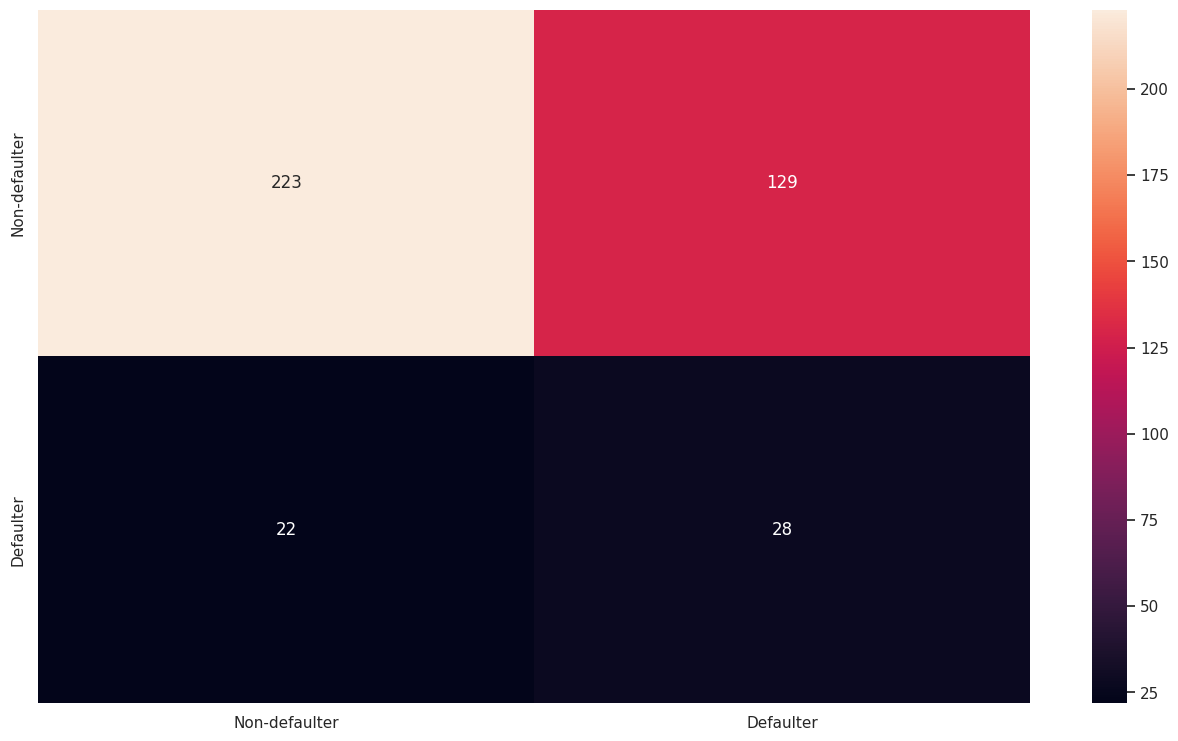

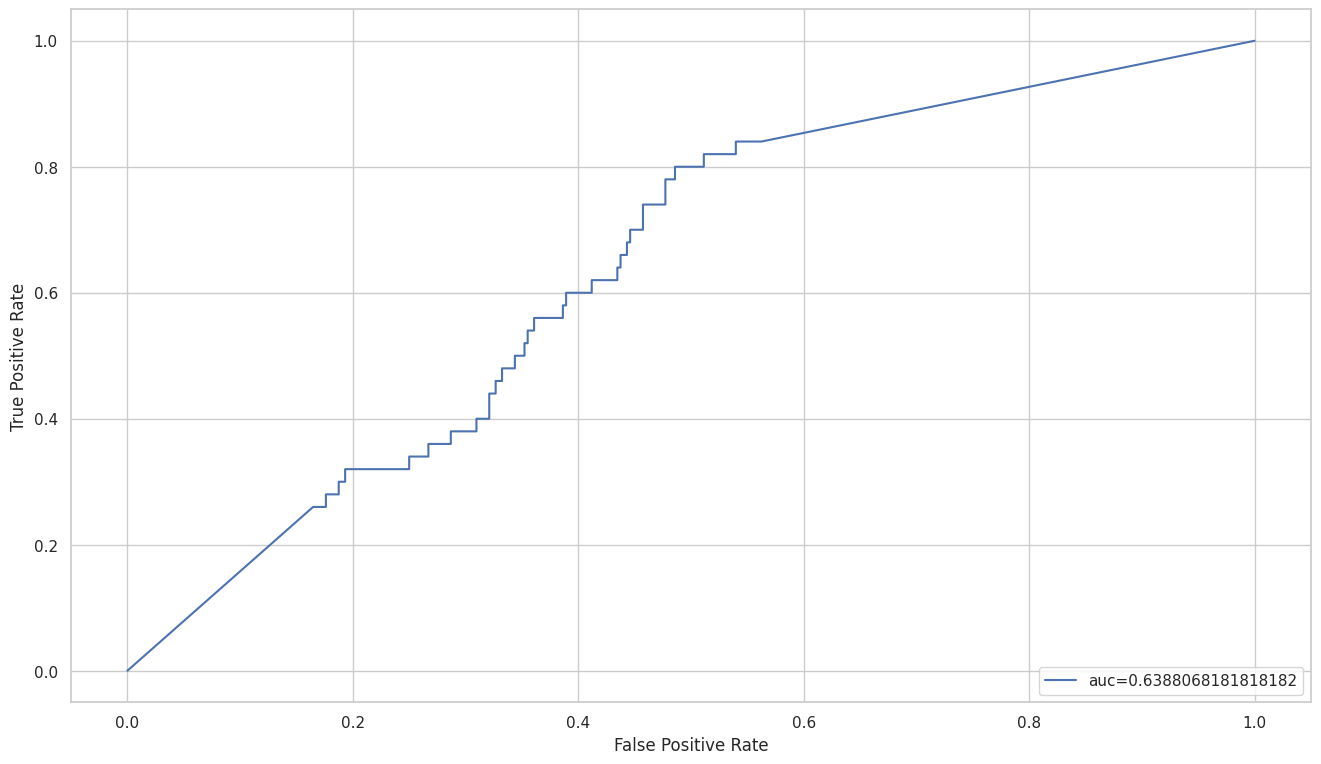


The average cross-validation score is 0.8506296296296295


In [ ]:
#model tuning
param_grid = [
  {'n_neighbors': [3,5,10,15],'algorithm': ['ball_tree', 'kd_tree', 'brute'],'weights':['uniform','distance']}
    ]
model_k = KNeighborsClassifier()
model_k_gs = GridSearchCV(model_k,param_grid,cv=2,n_jobs=-1)
model_k_gs.fit(X_train_res, y_train_res)
print("The best estimator is : ",model_k_gs.best_estimator_)

#Classification report
pred_k_cv = model_k_gs.best_estimator_.predict(X_test)
print ("\nAccuracy with best estimator : ",accuracy_score(y_test,pred_k_cv))
print("\nKNeighbors Classification Report: \n",classification_report(y_test, pred_k_cv, target_names=None))

#Confusion Matrix
plt.figure(figsize=(16,9))
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(confusion_matrix(y_test, pred_k_cv),annot=True,fmt='2.5g',annot_kws=akws,\
            xticklabels=["Non-defaulter","Defaulter"],\
           yticklabels=["Non-defaulter","Defaulter"])
plt.show()

#ROC curve
probs = model_k_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(16,9))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_k_gs.best_estimator_,X, y, cv=25, n_jobs=-1)
print("\nThe average cross-validation score is %s"%cv_scores.mean())

Again, the KNeighbors classifier failed to classify the defaulters for us. Lets move on to Support Vector Classifier (SVC) now.


### SVC

The best estimator is :  SVC(C=10, gamma=0.01, probability=True)
Accuracy with best estimator :  0.8507462686567164
SVC Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       352
           1       0.19      0.06      0.09        50

    accuracy                           0.85       402
   macro avg       0.53      0.51      0.50       402
weighted avg       0.79      0.85      0.82       402



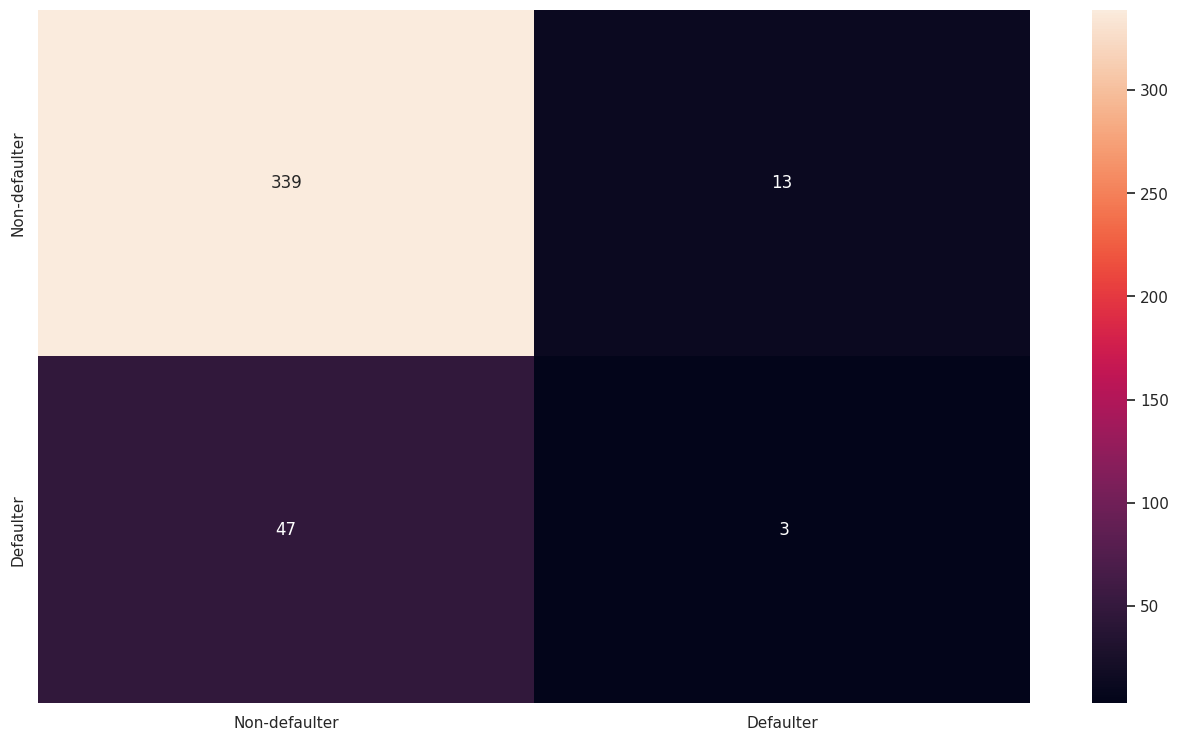

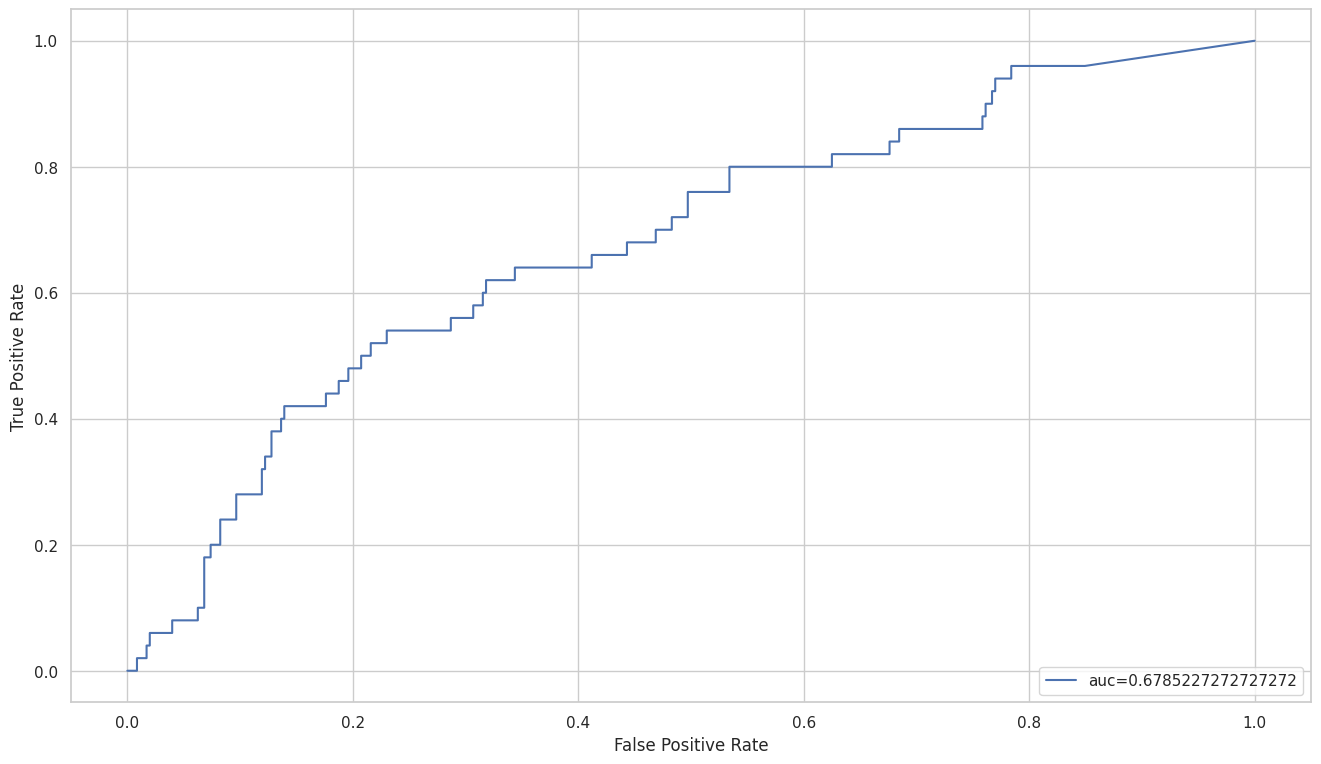

The average cross-validation score is 0.8580621890547263


In [ ]:
#model tuning
param_grid = [
  {'C': [1,10], 'gamma':[0.01,0.001],'kernel': ['poly', 'rbf', 'sigmoid']}
    ]
model_svc = svm.SVC(probability=True)
model_svc_gs = GridSearchCV(model_svc,param_grid,cv=2,n_jobs=-1)
model_svc_gs.fit(X_train_res, y_train_res)
print("The best estimator is : ",model_svc_gs.best_estimator_)

#Classification report
pred_svc_cv = model_svc_gs.best_estimator_.predict(X_test)
print ("Accuracy with best estimator : ",accuracy_score(y_test,pred_svc_cv))
print("SVC Classification Report: \n",classification_report(y_test, pred_svc_cv, target_names=None))

#Confusion Matrix
plt.figure(figsize=(16,9))
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(confusion_matrix(y_test, pred_svc_cv),annot=True,fmt='2.5g',annot_kws=akws,\
            xticklabels=["Non-defaulter","Defaulter"],\
           yticklabels=["Non-defaulter","Defaulter"])
plt.show()

#ROC curve
probs = model_svc_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(16,9))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_svc_gs.best_estimator_,X,y,cv=10,n_jobs=-1)
print("The average cross-validation score is %s"%cv_scores.mean())

### XGBoost

The best estimator is :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy with best estimator :  0.8606965174129353

XGBoost Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       352
           1       0.31    

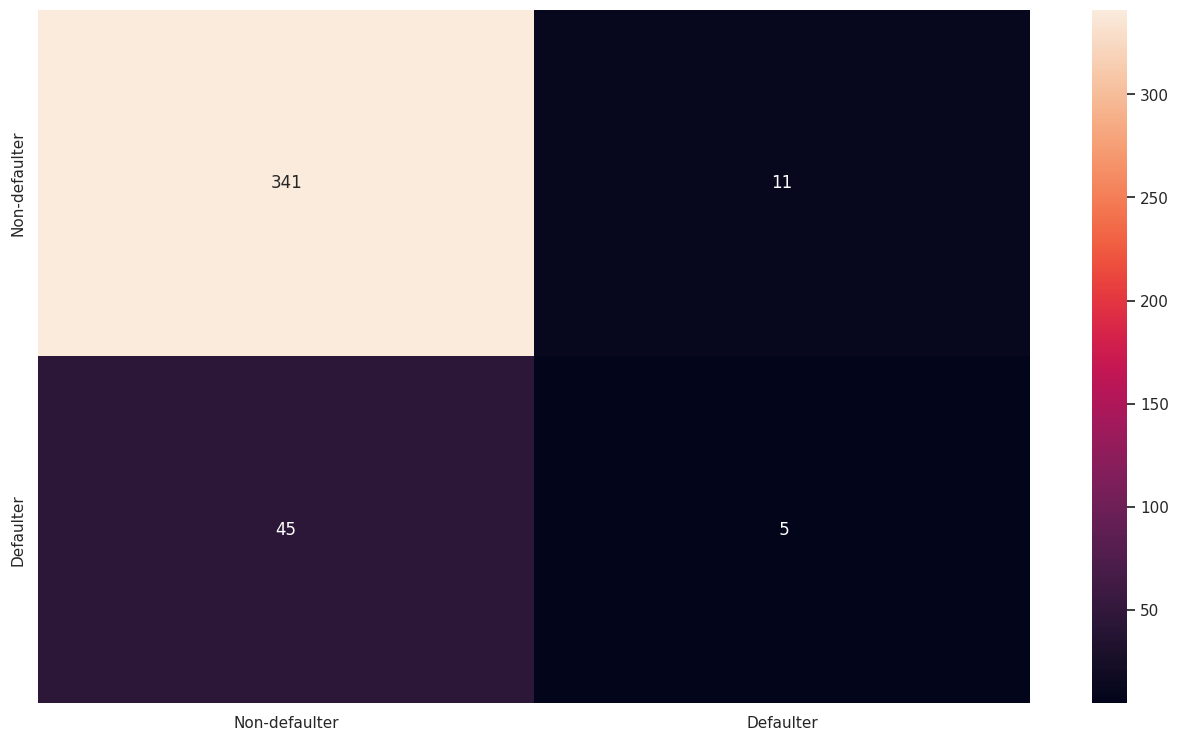

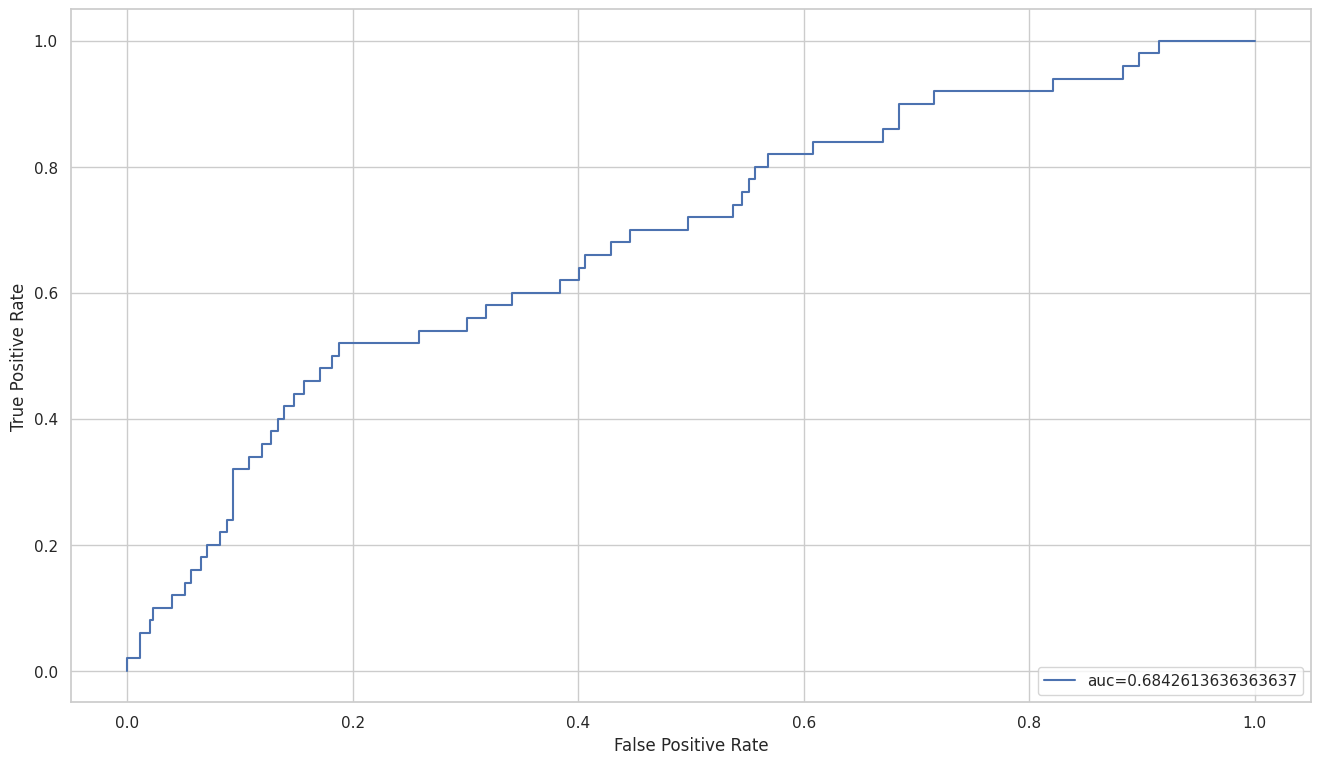


The average cross-validation score is 0.8740061728395062


In [ ]:
#model tuning
param_grid = [
  {'n_estimators': [25,50,75],'max_depth': [2,4,6,8]}
    ]
model = XGBClassifier()
model_gs = GridSearchCV(model,param_grid,cv=10,n_jobs=-1)
model_gs.fit(X_train_res, y_train_res)
print("The best estimator is : ",model_gs.best_estimator_)

#Classification report
pred_cv = model_gs.best_estimator_.predict(X_test)
print ("\nAccuracy with best estimator : ",accuracy_score(y_test,pred_cv))
print("\nXGBoost Classification Report: \n",classification_report(y_test, pred_cv, target_names=None))

#Confusion Matrix
plt.figure(figsize=(16,9))
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(confusion_matrix(y_test, pred_cv),annot=True,fmt='2.5g',annot_kws=akws,\
            xticklabels=["Non-defaulter","Defaulter"],\
           yticklabels=["Non-defaulter","Defaulter"])
plt.show()

#ROC curve
probs = model_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(16,9))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_gs.best_estimator_,X, y, cv=25, n_jobs=-1)
print("\nThe average cross-validation score is %s"%cv_scores.mean())

### Random Forest

The best estimator is :  RandomForestClassifier(max_depth=8, n_estimators=75)

Accuracy with best estimator :  0.8482587064676617

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       352
           1       0.32      0.20      0.25        50

    accuracy                           0.85       402
   macro avg       0.61      0.57      0.58       402
weighted avg       0.82      0.85      0.83       402



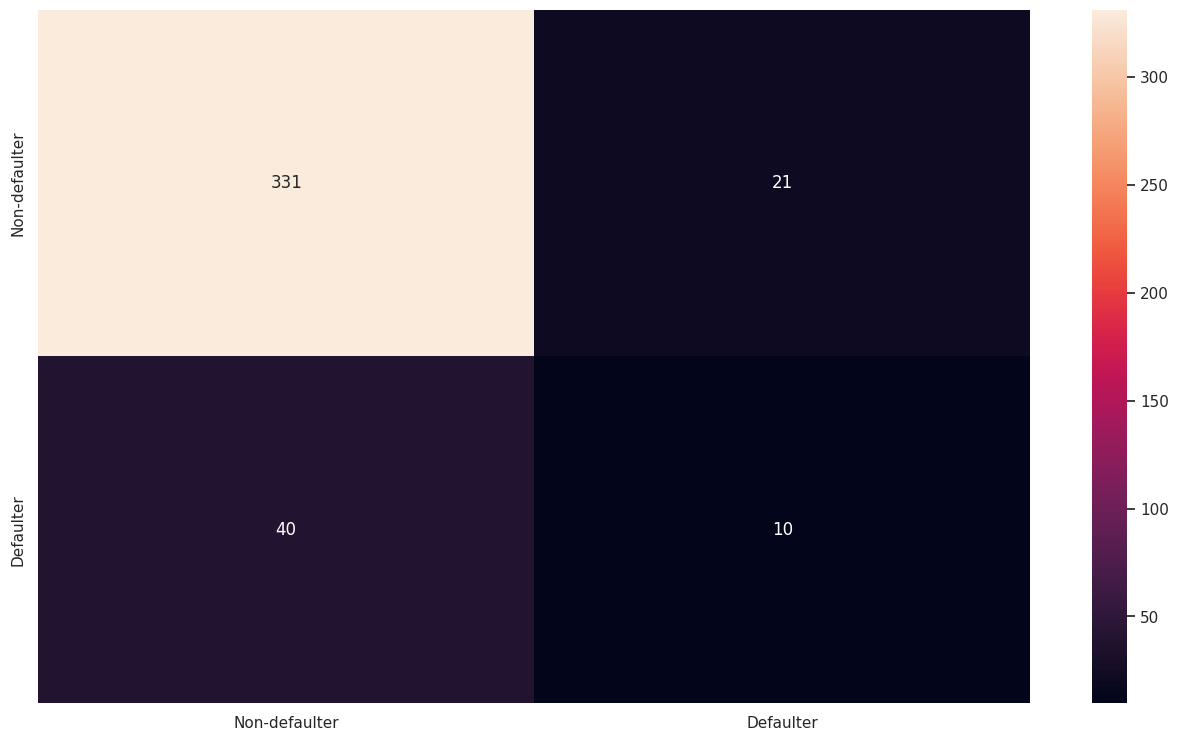

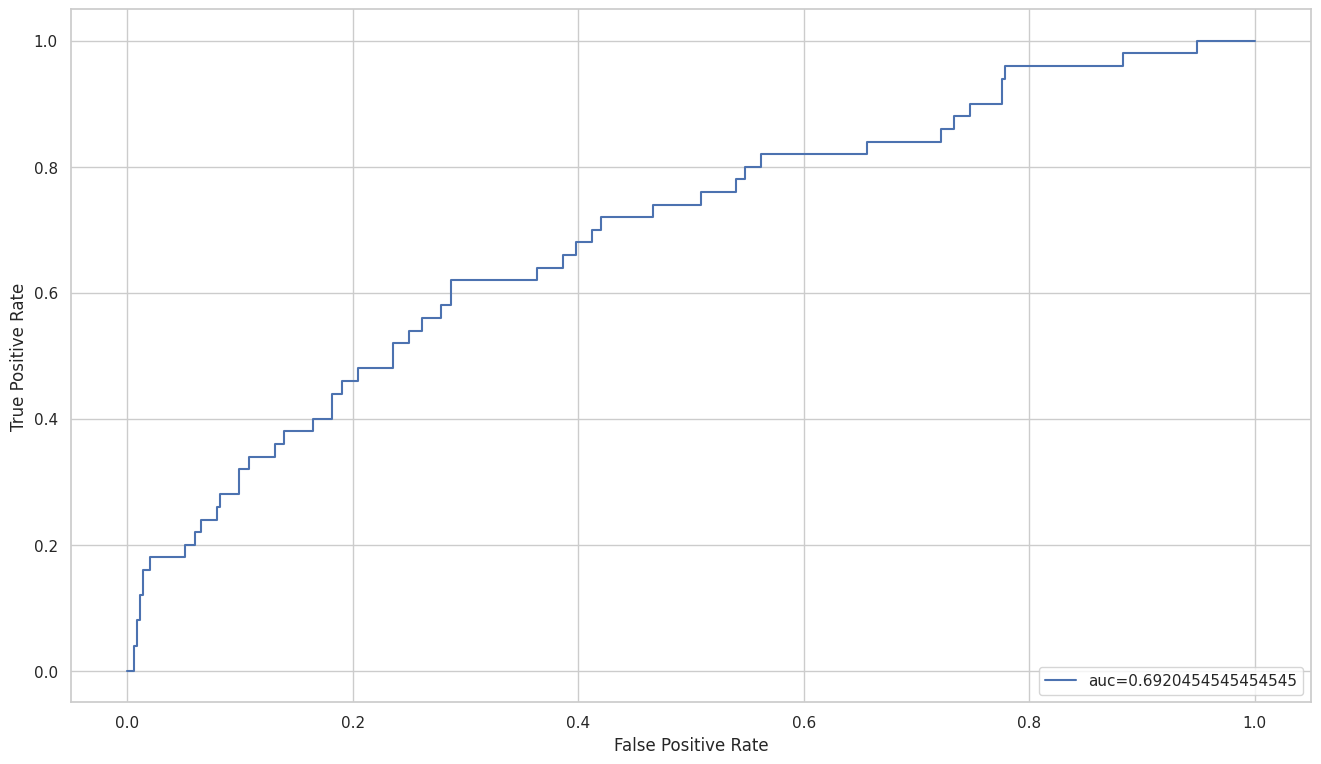


The average cross-validation score is 0.8784938271604937


In [ ]:
#model tuning
param_grid = [
  {'n_estimators': [25,50,75],'max_depth': [2,4,6,8]}
    ]
model_rf = RandomForestClassifier()
model_rf_gs = GridSearchCV(model_rf,param_grid,cv=10,n_jobs=-1)
model_rf_gs.fit(X_train_res, y_train_res)
print("The best estimator is : ",model_rf_gs.best_estimator_)

#Classification report
pred_rf_cv = model_rf_gs.best_estimator_.predict(X_test)
print ("\nAccuracy with best estimator : ",accuracy_score(y_test,pred_rf_cv))
print("\nRandom Forest Classification Report: \n",classification_report(y_test, pred_rf_cv, target_names=None))

#Confusion Matrix
plt.figure(figsize=(16,9))
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(confusion_matrix(y_test, pred_rf_cv),annot=True,fmt='2.5g',annot_kws=akws,\
            xticklabels=["Non-defaulter","Defaulter"],\
           yticklabels=["Non-defaulter","Defaulter"])
plt.show()


#ROC curve
probs = model_rf_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(16,9))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_rf_gs.best_estimator_,X, y, cv=25, n_jobs=-1)
print("\nThe average cross-validation score is %s"%cv_scores.mean())

### Decision Tree

The best estimator is :  DecisionTreeClassifier(max_depth=8)

Accuracy with best estimator :  0.8109452736318408

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       352
           1       0.28      0.32      0.30        50

    accuracy                           0.81       402
   macro avg       0.59      0.60      0.59       402
weighted avg       0.82      0.81      0.82       402



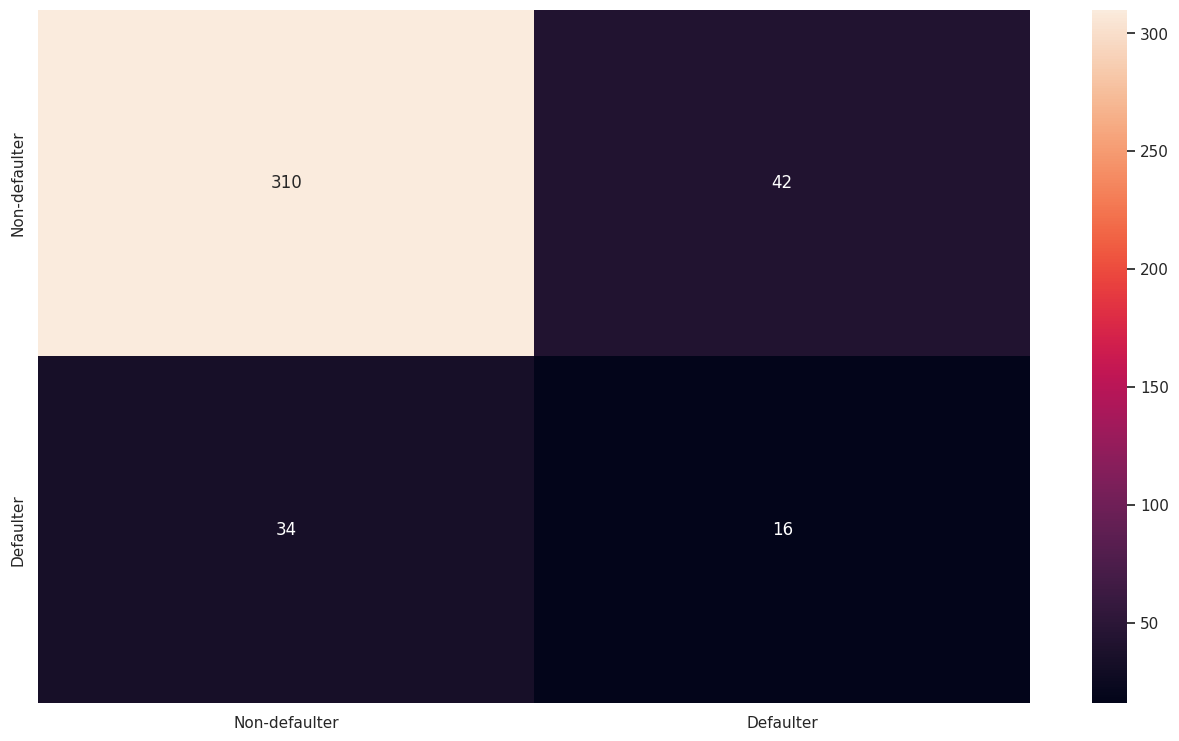

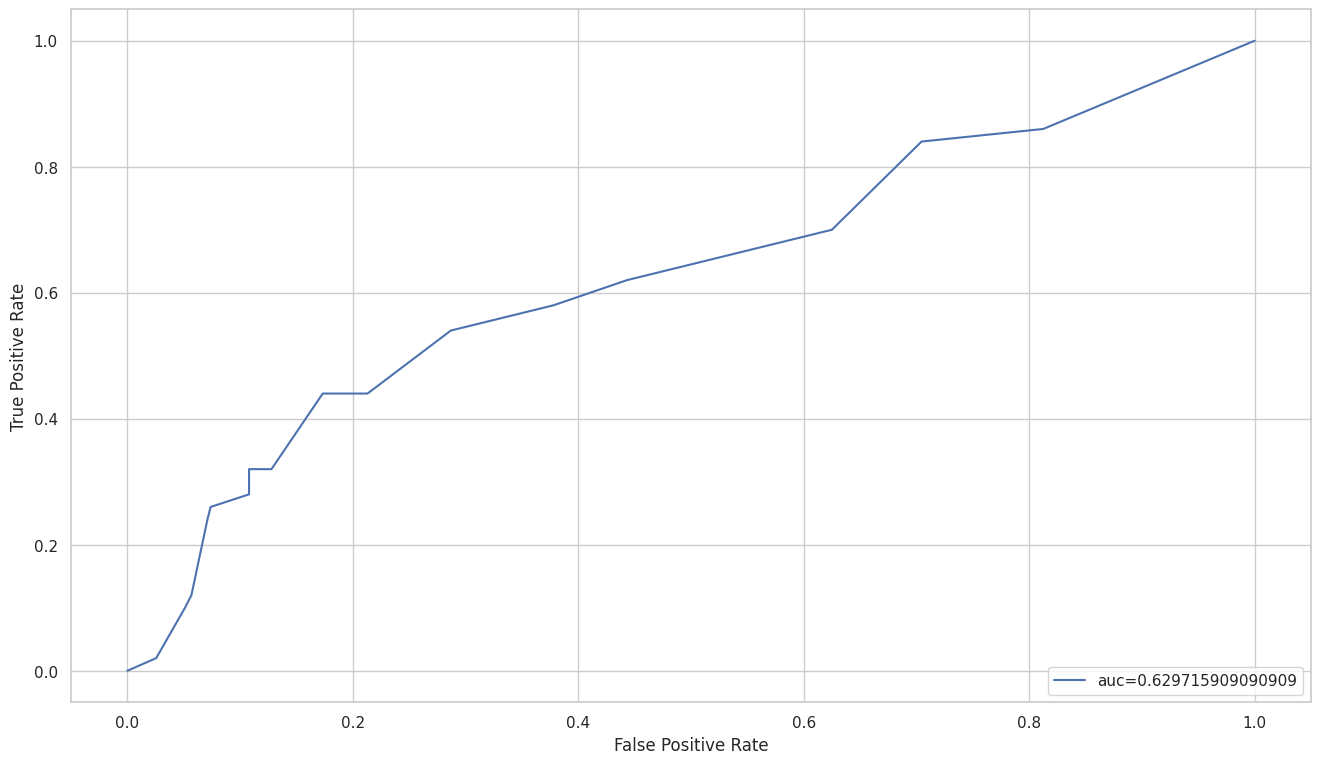


The average cross-validation score is 0.8217345679012346


In [ ]:
#model tuning
param_grid = [
  {'max_depth': [2,4,6,8],'criterion':['entropy','gini']}
    ]
model_dt = DecisionTreeClassifier()
model_dt_gs = GridSearchCV(model_dt,param_grid,cv=10,n_jobs=-1)
model_dt_gs.fit(X_train_res, y_train_res)
print("The best estimator is : ",model_dt_gs.best_estimator_)

#Classification report
pred_dt_cv = model_dt_gs.best_estimator_.predict(X_test)
print ("\nAccuracy with best estimator : ",accuracy_score(y_test,pred_dt_cv))
print("\nDecision Tree Classification Report: \n",classification_report(y_test, pred_dt_cv, target_names=None))

#Confusion Matrix
plt.figure(figsize=(16,9))
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(confusion_matrix(y_test, pred_dt_cv),annot=True,fmt='2.5g',annot_kws=akws,\
            xticklabels=["Non-defaulter","Defaulter"],\
           yticklabels=["Non-defaulter","Defaulter"])
plt.show()

#ROC curve
probs = model_dt_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(16,9))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_dt_gs.best_estimator_,X, y, cv=25, n_jobs=-1)
print("\nThe average cross-validation score is %s"%cv_scores.mean())

### References

1. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html